# AIFFEL_1st_Hackathon :: 8Ï°∞(JYK)
---

## Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
---

### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [1]:
import os
from os.path import join

import pandas as pd
import numpy as np
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autotime

time: 246 ¬µs (started: 2021-02-10 14:55:45 +09:00)


In [2]:
import tensorflow as tf

def init_gpu():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
      try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
          tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
      except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
init_gpu()

1 Physical GPUs, 1 Logical GPUs
time: 1.35 s (started: 2021-02-10 14:55:46 +09:00)


In [3]:
!pwd

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/2.code
time: 115 ms (started: 2021-02-10 14:55:47 +09:00)


In [4]:
# workspace_dirÏùÑ pwdÏóêÏÑú ÌôïÏù∏Ìïú Î≥∏Ïù∏Ïùò Ï£ºÏÜåÎ°ú Î∞îÍøîÏ£ºÏÑ∏Ïöî
workspace_dir = os.getenv('HOME') + '/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon'

time: 609 ¬µs (started: 2021-02-10 14:55:49 +09:00)


In [5]:
data_dir = workspace_dir + '/1.data'
code_dir = workspace_dir + '/2.code'
submission_dir = workspace_dir + '/3.submission'

train_data_path = join(data_dir, 'sales_train.csv')
test_data_path = join(data_dir, 'test.csv')
sample_submission_data_path = join(data_dir,'sample_submission.csv')
item_categories_data_path = join(data_dir, 'item_categories.csv')
items_data_path = join(data_dir, 'items.csv')
shops_data_path = join(data_dir, 'shops.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
sample_submission = pd.read_csv(sample_submission_data_path)
item_categories = pd.read_csv(item_categories_data_path)
items = pd.read_csv(items_data_path)
shops = pd.read_csv(shops_data_path)

item_categories_with_eng_name_data_path = join(data_dir, 'item_category_with_eng_name.csv')
item_categories_eng = pd.read_csv(item_categories_with_eng_name_data_path)

print('train data dim : {}'.format(train.shape)) # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú
print('test data dim : {}'.format(test.shape))    # ÏãúÌóò Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú
print('submission dim : {}'.format(sample_submission.shape)) # Ï†úÏ∂ú ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú
print('item_categories data dim : {}'.format(item_categories.shape)) # ÏïÑÏù¥ÌÖú Ïπ¥Îç∞Í≥†Î¶¨ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú
print('items data dim : {}'.format(items.shape)) # ÏïÑÏù¥ÌÖú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú
print('shops data dim : {}'.format(shops.shape)) # ÏÉÅÏ†ê Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú

train data dim : (2935849, 6)
test data dim : (214200, 3)
submission dim : (214200, 2)
item_categories data dim : (84, 2)
items data dim : (22170, 3)
shops data dim : (60, 2)
time: 1.08 s (started: 2021-02-10 14:55:49 +09:00)


### Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
Îç∞Ïù¥ÌÑ∞ ÏùòÏ°¥ÎèÑÍ∞Ä ÎÇÆÏùÄ ÏàúÏúºÎ°ú ÌÉêÏÉâ

#### item_categories
- item_categories.csvÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ
- name of item category

In [6]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
time: 8.71 ms (started: 2021-02-10 14:55:53 +09:00)


In [7]:
item_categories.tail(10)

item_category_name  item_category_id
74               –ü—Ä–æ–≥—Ä–∞–º–º—ã - MAC (–¶–∏—Ñ—Ä–∞)                74
75          –ü—Ä–æ–≥—Ä–∞–º–º—ã - –î–ª—è –¥–æ–º–∞ –∏ –æ—Ñ–∏—Å–∞                75
76  –ü—Ä–æ–≥—Ä–∞–º–º—ã - –î–ª—è –¥–æ–º–∞ –∏ –æ—Ñ–∏—Å–∞ (–¶–∏—Ñ—Ä–∞)                76
77                 –ü—Ä–æ–≥—Ä–∞–º–º—ã - –û–±—É—á–∞—é—â–∏–µ                77
78         –ü—Ä–æ–≥—Ä–∞–º–º—ã - –û–±—É—á–∞—é—â–∏–µ (–¶–∏—Ñ—Ä–∞)                78
79                             –°–ª—É–∂–µ–±–Ω—ã–µ                79
80                    –°–ª—É–∂–µ–±–Ω—ã–µ - –ë–∏–ª–µ—Ç—ã                80
81               –ß–∏—Å—Ç—ã–µ –Ω–æ—Å–∏—Ç–µ–ª–∏ (—à–ø–∏–ª—å)                81
82             –ß–∏—Å—Ç—ã–µ –Ω–æ—Å–∏—Ç–µ–ª–∏ (—à—Ç—É—á–Ω—ã–µ)                82
83                      –≠–ª–µ–º–µ–Ω—Ç—ã –ø–∏—Ç–∞–Ω–∏—è                83

time: 12.6 ms (started: 2021-02-10 14:55:53 +09:00)


- Îü¨ÏãúÏïÑÏñ¥Î°úÎäî Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ìï¥ÌïòÎäî Í≤ÉÏóê Ïñ¥Î†§ÏõÄÏù∏ ÏûàÏñ¥ item_category_nameÏùÑ ÏòÅÏñ¥Î°ú Î≤àÏó≠Ìïú item_category_name_eng columnÏùÑ Í∞ÄÏßÄÎäî Î¨∏ÏÑú ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄ `item_categories_eng`Î°ú Ï†ÄÏû•ÌïòÏòÄÎã§.

In [8]:
item_categories_with_eng_name_data_path = join(data_dir, 'item_category_with_eng_name.csv')
item_categories_eng = pd.read_csv(item_categories_with_eng_name_data_path)

time: 2.54 ms (started: 2021-02-10 14:55:54 +09:00)


In [9]:
item_categories_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   item_category_id        84 non-null     int64 
 1   item_category_name      84 non-null     object
 2   item_category_name_eng  84 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.1+ KB
time: 3.62 ms (started: 2021-02-10 14:55:54 +09:00)


In [10]:
item_categories_eng.tail(10)

item_category_id                    item_category_name  \
74                74               –ü—Ä–æ–≥—Ä–∞–º–º—ã - MAC (–¶–∏—Ñ—Ä–∞)   
75                75          –ü—Ä–æ–≥—Ä–∞–º–º—ã - –î–ª—è –¥–æ–º–∞ –∏ –æ—Ñ–∏—Å–∞   
76                76  –ü—Ä–æ–≥—Ä–∞–º–º—ã - –î–ª—è –¥–æ–º–∞ –∏ –æ—Ñ–∏—Å–∞ (–¶–∏—Ñ—Ä–∞)   
77                77                 –ü—Ä–æ–≥—Ä–∞–º–º—ã - –û–±—É—á–∞—é—â–∏–µ   
78                78         –ü—Ä–æ–≥—Ä–∞–º–º—ã - –û–±—É—á–∞—é—â–∏–µ (–¶–∏—Ñ—Ä–∞)   
79                79                             –°–ª—É–∂–µ–±–Ω—ã–µ   
80                80                    –°–ª—É–∂–µ–±–Ω—ã–µ - –ë–∏–ª–µ—Ç—ã   
81                81               –ß–∏—Å—Ç—ã–µ –Ω–æ—Å–∏—Ç–µ–ª–∏ (—à–ø–∏–ª—å)   
82                82             –ß–∏—Å—Ç—ã–µ –Ω–æ—Å–∏—Ç–µ–ª–∏ (—à—Ç—É—á–Ω—ã–µ)   
83                83                      –≠–ª–µ–º–µ–Ω—Ç—ã –ø–∏—Ç–∞–Ω–∏—è   

                      item_category_name_eng  
74                  Programs - MAC (Digital)  
75            Programs - For Home and Office  
76  Programs - For Home and Office (Digital)  
77                    Programs - Educational  
78          Programs - Educational (Digital)  
79                                   Service  
80                         Service - Tickets  
81                       Blank media (spire)  
82                       Blank media (piece)  
83                                 Batteries

time: 6.46 ms (started: 2021-02-10 14:55:54 +09:00)


- Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [11]:
np.sum(pd.isnull(item_categories_eng))

item_category_id          0
item_category_name        0
item_category_name_eng    0
dtype: int64

time: 3.03 ms (started: 2021-02-10 14:55:54 +09:00)


- `get_item_category_name(id, lang="ru")`

In [12]:
def get_item_category_name(id, lang="ru"):
    item = item_categories_eng[item_categories_eng['item_category_id'] == id].reset_index(drop=True)
    if len(item) <= 0 : print(f'[get_item_category_name] Invalid id {id}')
    elif lang == "ru": return item.loc[0]['item_category_name']
    elif lang == "eng": return item.loc[0]['item_category_name_eng']

time: 712 ¬µs (started: 2021-02-10 14:55:55 +09:00)


In [13]:
get_item_category_name(83), get_item_category_name(83, 'eng'), get_item_category_name(84)

[get_item_category_name] Invalid id 84


('–≠–ª–µ–º–µ–Ω—Ç—ã –ø–∏—Ç–∞–Ω–∏—è', 'Batteries', None)

time: 5.18 ms (started: 2021-02-10 14:55:55 +09:00)


#### items
- items.csvÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ
- ÌåêÎß§ ÌíàÎ™©Ïùò id, name, category(FK, item_categories.item_category_id)Ïóê Í¥ÄÌïú Ï†ïÎ≥¥Î•º Í∞ÄÏßÄÍ≥† ÏûàÎã§.

In [14]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
time: 4.77 ms (started: 2021-02-10 14:55:56 +09:00)


In [15]:
items.tail(10)

item_name  item_id  \
22160                         –Ø–†–ú–ê–†–ö–ê –¢–©–ï–°–õ–ê–í–ò–Ø (–†–µ–≥–∏–æ–Ω)    22160   
22161                   –Ø–†–û–°–õ–ê–í. –¢–´–°–Ø–ß–£ –õ–ï–¢ –ù–ê–ó–ê–î —ç (BD)    22161   
22162                                             –Ø–†–û–°–¢–¨    22162   
22163                                   –Ø–†–û–°–¢–¨ ( —Ä–µ–≥–∏–æ–Ω)    22163   
22164                                        –Ø–†–û–°–¢–¨ (BD)    22164   
22165             –Ø–¥–µ—Ä–Ω—ã–π —Ç–∏—Ç–±–∏—Ç 2 [PC, –¶–∏—Ñ—Ä–æ–≤–∞—è –≤–µ—Ä—Å–∏—è]    22165   
22166    –Ø–∑—ã–∫ –∑–∞–ø—Ä–æ—Å–æ–≤ 1–°:–ü—Ä–µ–¥–ø—Ä–∏—è—Ç–∏—è  [–¶–∏—Ñ—Ä–æ–≤–∞—è –≤–µ—Ä—Å–∏—è]    22166   
22167  –Ø–∑—ã–∫ –∑–∞–ø—Ä–æ—Å–æ–≤ 1–°:–ü—Ä–µ–¥–ø—Ä–∏—è—Ç–∏—è 8 (+CD). –•—Ä—É—Å—Ç–∞–ª–µ...    22167   
22168                                –Ø–π—Ü–æ –¥–ª—è Little Inu    22168   
22169                      –Ø–π—Ü–æ –¥—Ä–∞–∫–æ–Ω–∞ (–ò–≥—Ä–∞ –ø—Ä–µ—Å—Ç–æ–ª–æ–≤)    22169   

       item_category_id  
22160                40  
22161                37  
22162                40  
22163                40  
22164                37  
22165                31  
22166                54  
22167                49  
22168                62  
22169                69

time: 5.61 ms (started: 2021-02-10 14:55:56 +09:00)


- Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [16]:
np.sum(pd.isnull(items))

item_name           0
item_id             0
item_category_id    0
dtype: int64

time: 3.86 ms (started: 2021-02-10 14:55:57 +09:00)


- `get_item_name(id)`

In [17]:
def get_item_name(id, lang="ru"):
    item = items[items['item_id'] == id].reset_index(drop=True)
    return item.loc[0]['item_name'] if len(item) > 0 else print(f'[get_item_name] Invalid id {id}')

time: 700 ¬µs (started: 2021-02-10 14:55:57 +09:00)


- `get_item_category_id(id)`

In [18]:
def get_item_category_id(id):
    item = items[items['item_id'] == id].reset_index(drop=True)
    return item.loc[0]['item_category_id'] if len(item) > 0 else print(f'[get_item_name] Invalid id {id}')

time: 512 ¬µs (started: 2021-02-10 14:55:57 +09:00)


In [19]:
get_item_name(22169), get_item_name(22170)

[get_item_name] Invalid id 22170


('–Ø–π—Ü–æ –¥—Ä–∞–∫–æ–Ω–∞ (–ò–≥—Ä–∞ –ø—Ä–µ—Å—Ç–æ–ª–æ–≤)', None)

time: 5.45 ms (started: 2021-02-10 14:55:58 +09:00)


#### shops
- shops.csvÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ
- Í∞ÄÍ≤åÏùò id, nameÏóê Í¥ÄÌïú Ï†ïÎ≥¥Î•º Í∞ÄÏßÄÍ≥† ÏûàÎã§.

In [20]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
time: 5.08 ms (started: 2021-02-10 14:55:59 +09:00)


In [21]:
shops.tail(10)

shop_name  shop_id
50         –¢—é–º–µ–Ω—å –¢–¶ "–ì—É–¥–≤–∏–Ω"       50
51  –¢—é–º–µ–Ω—å –¢–¶ "–ó–µ–ª–µ–Ω—ã–π –ë–µ—Ä–µ–≥"       51
52       –£—Ñ–∞ –¢–ö "–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π"       52
53           –£—Ñ–∞ –¢–¶ "–°–µ–º—å—è" 2       53
54            –•–∏–º–∫–∏ –¢–¶ "–ú–µ–≥–∞"       54
55   –¶–∏—Ñ—Ä–æ–≤–æ–π —Å–∫–ª–∞–¥ 1–°-–û–Ω–ª–∞–π–Ω       55
56       –ß–µ—Ö–æ–≤ –¢–†–¶ "–ö–∞—Ä–Ω–∞–≤–∞–ª"       56
57    –Ø–∫—É—Ç—Å–∫ –û—Ä–¥–∂–æ–Ω–∏–∫–∏–¥–∑–µ, 56       57
58    –Ø–∫—É—Ç—Å–∫ –¢–¶ "–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π"       58
59     –Ø—Ä–æ—Å–ª–∞–≤–ª—å –¢–¶ "–ê–ª—å—Ç–∞–∏—Ä"       59

time: 5.63 ms (started: 2021-02-10 14:55:59 +09:00)


- Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [22]:
np.sum(pd.isnull(shops))

shop_name    0
shop_id      0
dtype: int64

time: 3.33 ms (started: 2021-02-10 14:56:00 +09:00)


#### train

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
time: 3 ms (started: 2021-02-10 14:56:00 +09:00)


In [24]:
train

date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...               ...  
2935844           1.0  
2935845           1.0  
2935846           1.0  
2935847           1.0  
2935848           1.0  

[2935849 rows x 6 columns]

time: 10.7 ms (started: 2021-02-10 14:56:00 +09:00)


- dateÍ∞Ä 'Ïùº/Ïõî/ÎÖÑ' ÏàúÏù¥Í∏∞ ÎïåÎ¨∏Ïóê sortÎ•º ÌïòÍ±∞ÎÇò Ìï† Îïå Î∂àÌé∏Ìïú ÏÇ¨Ìï≠Ïù¥ ÏûàÎã§. dateÏùò formatÏùÑ 'ÎÖÑÏõîÏùº'Î°ú Î≥ÄÍ≤ΩÌïúÎã§.

In [25]:
def change_date(date):
    splited = date.split('.')
    return f'{splited[2]}{splited[1]}{splited[0]}'
train['date'] = train['date'].apply(change_date).astype(str)

time: 1.64 s (started: 2021-02-10 14:56:01 +09:00)


In [26]:
# mean ÌïòÏßÄ ÎßêÍ≤É, ÌÑ∞Ïßê
train.agg(['count','min','max'])

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
count   2935849         2935849  2935849  2935849   2935849.0     2935849.0
min    20130101               0        0        0        -1.0         -22.0
max    20151031              33       59    22169    307980.0        2169.0

time: 726 ms (started: 2021-02-10 14:56:03 +09:00)


- Îç∞Ïù¥ÌÑ∞ Ïú†Ìö®ÏÑ± ÌôïÏù∏
    1. train.shop_idÎäî shop.shop_idÏóê Ï°¥Ïû¨Ìï¥Ïïº ÌïúÎã§.
    2. train.item_idÎäî shop.item_idÏóê Ï°¥Ïû¨Ìï¥Ïïº ÌïúÎã§.
    3. dateÏôÄ date_block_numÍ∞Ä ÏïåÎßûÍ≤å Îß§ÏπòÎêòÏñ¥Ïïº ÌïúÎã§.

In [27]:
# train.shop_idÎäî shop.shop_idÏóê Ï°¥Ïû¨Ìï¥Ïïº ÌïúÎã§.
train_shop = train['shop_id'].unique()
shops_shop = shops['shop_id'].unique()

is_shop_exist = lambda x : x in shops_shop
validation_shop_id_res = np.array([ is_shop_exist(shop) for shop in train_shop ])
validation_shop_id_res.all()

True

time: 18.1 ms (started: 2021-02-10 14:56:03 +09:00)


In [28]:
# train.item_idÎäî shop.item_idÏóê Ï°¥Ïû¨Ìï¥Ïïº ÌïúÎã§.
train_item = train['item_id'].unique()
items_item = items['item_id'].unique()

is_item_exist = lambda x : x in items_item
validation_item_id_res = np.array([ is_item_exist(item) for item in train_item ])
validation_item_id_res.all()

True

time: 328 ms (started: 2021-02-10 14:56:03 +09:00)


In [29]:
# dateÏôÄ date_block_numÍ∞Ä ÏïåÎßûÍ≤å Îß§ÏπòÎêòÏñ¥Ïïº ÌïúÎã§.
year = ['2013', '2014', '2015']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
date_block_list = [ f'{y}{m}' for y in year for m in month ]
date_block_num_dict = { n : i for i, n in enumerate(date_block_list)}
date_block_num_dict

{'201301': 0,
 '201302': 1,
 '201303': 2,
 '201304': 3,
 '201305': 4,
 '201306': 5,
 '201307': 6,
 '201308': 7,
 '201309': 8,
 '201310': 9,
 '201311': 10,
 '201312': 11,
 '201401': 12,
 '201402': 13,
 '201403': 14,
 '201404': 15,
 '201405': 16,
 '201406': 17,
 '201407': 18,
 '201408': 19,
 '201409': 20,
 '201410': 21,
 '201411': 22,
 '201412': 23,
 '201501': 24,
 '201502': 25,
 '201503': 26,
 '201504': 27,
 '201505': 28,
 '201506': 29,
 '201507': 30,
 '201508': 31,
 '201509': 32,
 '201510': 33,
 '201511': 34,
 '201512': 35}

time: 2.76 ms (started: 2021-02-10 14:56:04 +09:00)


In [30]:
train_date = train.loc[:, 'date':'date_block_num'].values
is_correct_block_num = lambda d, dn: True if date_block_num_dict[d] == dn else False
res = np.array([ is_correct_block_num(d[:6], dn) for d, dn in train_date ])
res.all()

True

time: 3.39 s (started: 2021-02-10 14:56:04 +09:00)


- ÌôïÏù∏ Í≤∞Í≥º, trainÏùò item_id, shop_id, date_block_numÏùÄ Ïú†Ìö®Ìïú Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.

#### test
- test.csvÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ
- ÌÖåÏä§Ìä∏Ïóê ÏÇ¨Ïö©Îê† Îç∞Ïù¥ÌÑ∞Î°ú, ID, shop_id, item_idÎ•º columnÏúºÎ°ú Í∞ÄÏßÄÍ≥† ÏûàÎã§.

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
time: 4.91 ms (started: 2021-02-10 14:56:07 +09:00)


#### sample_submission
- sample_submission.csvÏùò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ
- ÌÖåÏä§Ìä∏ Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† csvÏùò ÌååÏùºÏùÑ Ïò≥Î∞îÎ•∏ Ìè¨Îß∑ÏùÑ Ï†ïÏùòÌïòÍ≥† ÏûàÎã§.
- IDÎäî test.IDÏôÄ Í∞ôÏùÄ Í∞íÏùÑ Í∞ÄÏßÑÎã§.
- item_cnt_monthÎäî train date Ïù¥ÌõÑ ÌïúÎã¨(2015/11)Í∞Ñ ÌäπÏ†ï Í∞ÄÍ≤å(shop_id)ÏóêÏÑú ÌäπÏ†ï ÏïÑÏù¥ÌÖú(item_id)Í∞Ä ÏñºÎßàÎÇò ÌåêÎß§Îê†ÏßÄÎ•º ÏòàÏ∏°Ìïú Í∞íÏù¥Îã§.

In [32]:
sample_submission.tail()

ID  item_cnt_month
214195  214195             0.5
214196  214196             0.5
214197  214197             0.5
214198  214198             0.5
214199  214199             0.5

time: 6.93 ms (started: 2021-02-10 14:56:07 +09:00)


### Ïù¥ÏÉÅÏπò ÌÉêÏÉâ

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

time: 482 ¬µs (started: 2021-02-10 14:56:07 +09:00)


#### train.item_price

In [34]:
price_mean = train['item_price'].mean()
price_max = train['item_price'].max() + 100
price_min = train['item_price'].min() - 100

time: 39.2 ms (started: 2021-02-10 14:56:07 +09:00)


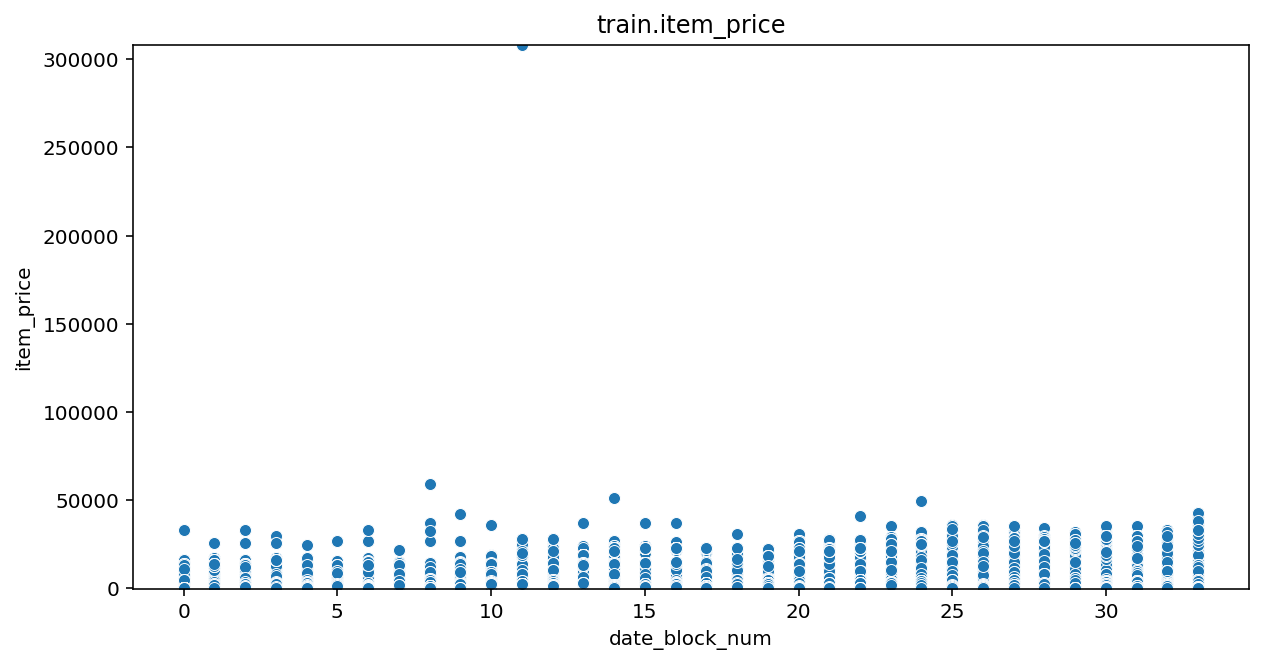

time: 7.72 s (started: 2021-02-10 14:56:07 +09:00)


In [35]:
fig, ax1 = plt.subplots(1, figsize=(10,5))
sns.scatterplot(data=train , x='date_block_num', y='item_price', palette="ch:r=-.2,d=.3_r", ax=ax1)
ax1.set_title('train.item_price')
ax1.set_ylim(top=price_max, bottom=price_min)
plt.show()

- Í∑∏ÎûòÌîÑÏÉÅÏóêÏÑú ÎÑàÎ¨¥ ÌÅ∞ Í∞íÏù¥ Î∞úÍ≤¨ ÎêòÏóàÎã§. Ïù¥ Í∞íÏóê ÎåÄÌï¥ ÏûêÏÑ∏Ìûà ÏïåÏïÑÎ≥¥Ïûê.

In [36]:
train[train['item_price'] > 100000]

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
1163158  20131213              11       12     6066    307980.0           1.0

time: 8.68 ms (started: 2021-02-10 14:56:15 +09:00)


In [37]:
print(f'item name : {get_item_name(6066)}')
print(f'item catetgory : {get_item_category_name(get_item_category_id(6066), "eng")}')

item name : Radmin 3  - 522 –ª–∏—Ü.
item catetgory : Programs - For Home and Office
time: 4.53 ms (started: 2021-02-10 14:56:15 +09:00)


- Î∞úÍ≤¨Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä Ïù¥ÏÉÅÏπòÏù∏ÏßÄ ÌäπÏù¥ÏπòÏù∏ÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌïòÏó¨ Ï†úÌíàÏùò Ï†ïÎ≥¥Î•º Ïù∏ÌÑ∞ÎÑ∑ÏÉÅÏúºÎ°ú Ï∞æÏïÑ Î≥¥ÏïòÎã§.
- Îç∞Ïù¥ÌÑ∞ Ï†úÍ≥µÏûêÏù∏ 1CÏùò Ï†úÌíà ÌåêÎß§ ÌôàÌéòÏù¥ÏßÄ(https://online.1c.ru/)ÏóêÏÑú ÏïÑÎûòÏôÄ Í∞ôÏùÄ Ï†úÌíàÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§. 
![note_01_price_outlier](https://user-images.githubusercontent.com/16831323/107468811-08232500-6bac-11eb-8fa8-9d5bbe059bcf.png)


- Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îäî RadminÏù¥ÎùºÎäî Ïö¥ÏòÅÏ≤¥Ï†úÎ°ú Ïù∏ÌÑ∞ÎÑ∑ÏÉÅÏóêÏÑúÎäî ÏµúÎåÄ 25Í∞úÏùò ÎùºÏù¥ÏÑºÏä§Î•º Î¨∂ÏùåÏúºÎ°ú ÌåêÎß§ÌïòÍ≥† ÏûàÎã§. item_name Ï†ïÎ≥¥Î•º Í∏∞Î∞òÏúºÎ°ú Ï∂îÎ¶¨ÌïòÎ©¥, Î¨∏Ï†úÏùò Îç∞Ïù¥ÌÑ∞ ***Radmin 3  - 522 –ª–∏—Ü.***ÏùÄ Radmin ÎùºÏù¥ÏÑºÏä§ 522Í∞úÎ•º Î¨∂ÏùåÏúºÎ°ú ÌåêÎß§Ìïú Í≤ÉÏúºÎ°ú ÏÉùÍ∞ÅÌï† Ïàò ÏûàÎã§. Í¥ÄÍ≥µÏÑúÎÇò Í∏∞ÏóÖÏóêÏÑú Îã®Ï≤¥Íµ¨Îß§Î•º ÌñàÎã§Í≥† ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§.
- ÌïòÏßÄÎßå Í∏àÏï°Ï†ÅÏúºÎ°ú ÏÇ¥Ìé¥ Î≥¥ÏïòÏùÑ Îïå, ÌïúÍ∞úÏùò ÎùºÏù¥ÏÑºÏä§Ïùò Í∞ÄÍ≤©Ïù¥ 1250Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê 522Í∞úÎ•º ÌåêÎß§ÌñàÎã§Îäî Í∞ÄÏ†ïÏù¥ ÎßûÏùÑÎ†§Î©¥ 652500(1250\*522)Í∞Ä ÎêòÏñ¥ÏïºÌïòÎäîÎç∞, Îç∞Ïù¥ÌÑ∞ÏÉÅÏùò Í∞íÏùÄ 307980Î≥¥Îã§ ÏõîÎì±Ìûà ÎÜíÏùÄ Í∞íÏùÑ Î≥¥Ïù∏Îã§. Ïã§ÏÉùÌôúÏùÑ ÏÉùÍ∞ÅÌï¥ Î≥¥Î©¥ ÎåÄÎüâÍµ¨Îß§Î•º Ìï† Îïå, Ìï†Ïù∏ÏùÑ Î∞õÎäî Í≤ΩÏö∞Í∞Ä ÏôïÏôïÏûàÎã§. Ïù¥Ï†êÏùÑ Í≥†Î†§ÌïòÎ©¥ 652500 * 0.472 = 307980Ïù¥ÎØÄÎ°ú 52.8%Î•º Ìï†Ïù∏ Î∞õÏïòÎã§Í≥† Î≥º Ïàò ÏûàÎã§.
- Ï∂©Î∂ÑÌûà ÎÇòÏò¨ Ïàò ÏûàÎäî ÏàòÏπòÏù¥Í∏∞ÎäîÌïòÎÇò 522Í∞úÏùò Ïö¥ÏòÅÏ≤¥Ï†úÎ•º ÌïúÎ≤àÏóê ÏÇ¨Îäî Í≤ÉÏùÄ ÌùîÌïòÏßÄ ÏïäÏùÄ Ïù¥Î≤§Ìä∏ Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÏÉÅÏπòÎ°ú Î∂ÑÎ•òÌïòÏó¨ Ï†úÍ±∞ÌïòÎäî Í≥≥Ïù¥ Ïò≥ÏïÑ Î≥¥Ïù∏Îã§.

In [38]:
train[train['item_price'] < 0]

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
484683  20130515               4       32     2973        -1.0           1.0

time: 11.6 ms (started: 2021-02-10 14:56:15 +09:00)


- ÏïÑÏù¥ÌÖúÏùò Í∞ÄÍ≤©Ïù¥ ÏùåÏàòÏù∏ Í≤ΩÏö∞Í∞Ä ÏûàÏóàÎã§. ÏûòÎ™ª ÏûÖÎ†•Îêú Îç∞Ïù¥ÌÑ∞Î°ú ÏÉùÍ∞ÅÌïòÏó¨ ÏÇ≠Ï†úÌïòÍ∏∞Î°ú ÌïúÎã§.

 #### train.item_cnt_day

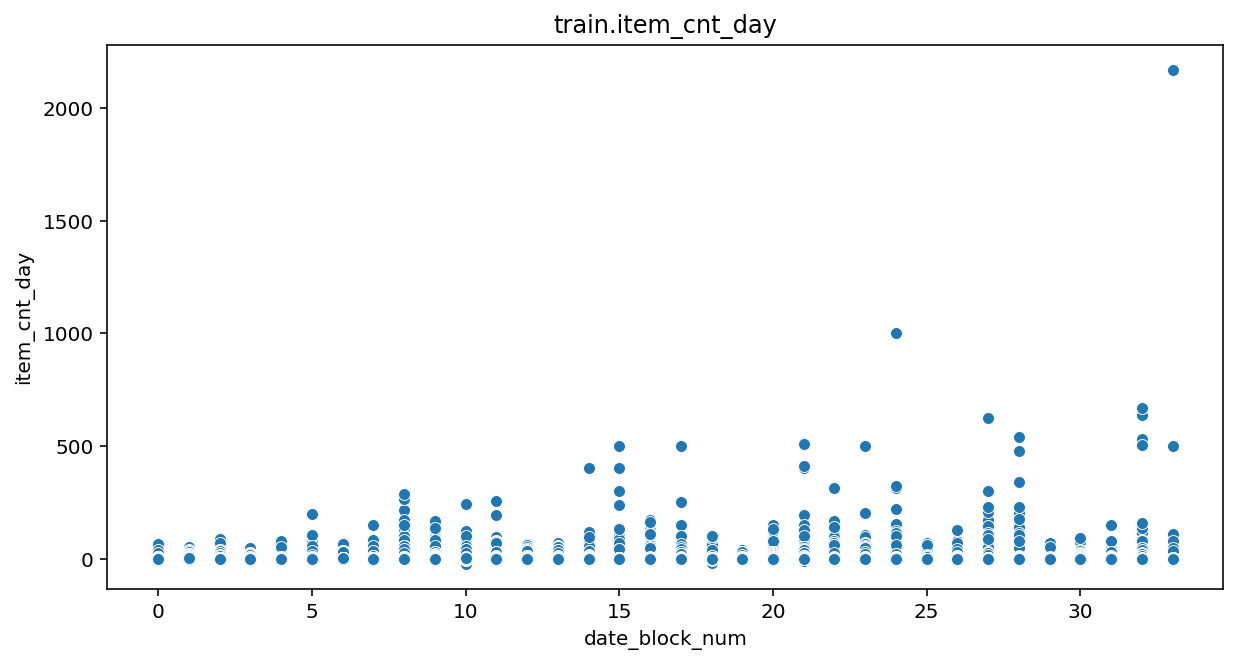

time: 9.11 s (started: 2021-02-10 14:56:15 +09:00)


In [39]:
fig, ax1 = plt.subplots(1, figsize=(10,5))
sns.scatterplot(data=train , x='date_block_num', y='item_cnt_day', ax=ax1)
ax1.set_title('train.item_cnt_day')
plt.show()

In [41]:
train[train['item_cnt_day'] > 800]

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
2326930  20150115              24       12    20949    4.000000        1000.0
2909818  20151028              33       12    11373    0.908714        2169.0

time: 9.64 ms (started: 2021-02-10 14:57:03 +09:00)


- Í∑∏ÎûòÌîÑÏùò Î™®ÏñëÏùÑ ÌÜµÌïòÏó¨ ÎÑàÎ¨¥ Îç∞Ïù¥ÌÑ∞Í∞Ä 2Í∞ú Ï°¥Ïû¨Ìï®ÏùÑ Ïïå Ïàò ÏûàÎã§.
- ÎÑàÎ¨¥ ÌÅ∞ Îç∞Ïù¥ÌÑ∞ 1. ['item_id']==11373
    - Í∞ÄÍ≤© ÎèôÏùº Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò Ï†úÌíàÎì§Ïóê ÎπÑÌï¥ Í∞ÄÍ≤©Ïù¥ ÎÑàÎ¨¥ Ï†ÄÎ†¥ÌïòÍ≥† ÌåêÎß§ÎüâÏù¥ ÎÜíÏúºÎ©¥ item_name `issue`ÎùºÎäî Îã®Ïñ¥Î•º Ìè¨Ìï®ÌïòÍ≥† ÏûàÎã§.Î∞∞ÏÜ°Ïù¥ Ïù¥Î†áÍ≤å ÎßéÎã§ÎäîÍ±∞Î©¥ Ìï†Ïù∏ Ïù¥Î≤§Ìä∏ÎùºÍ≥† Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§.
    - ÏùºÎ∞òÏ†ÅÏù¥ÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú ÏÇ≠Ï†úÌïòÎèÑÎ°ù ÌïúÎã§.
- ÎÑàÎ¨¥ ÌÅ∞ Îç∞Ïù¥ÌÑ∞ 2.
    - Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÏù¥ 1000Ïù∏Îç∞, Ïπ¥ÌÖåÍ≥†Î¶¨Î•¥ ÏÇ¥Ìé¥Î≥¥Îãà TÏÖîÏ∏†ÏòÄÎã§.
    - Îã®Ï≤¥ Ï£ºÎ¨∏ Îì± ÏùºÎ∞òÏ†ÅÏúºÎ°ú Î∞úÏÉùÌï† Ïàò ÏûàÎäî Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏÇ≠Ï†úÌïòÏßÄ ÏïäÎäîÎã§.

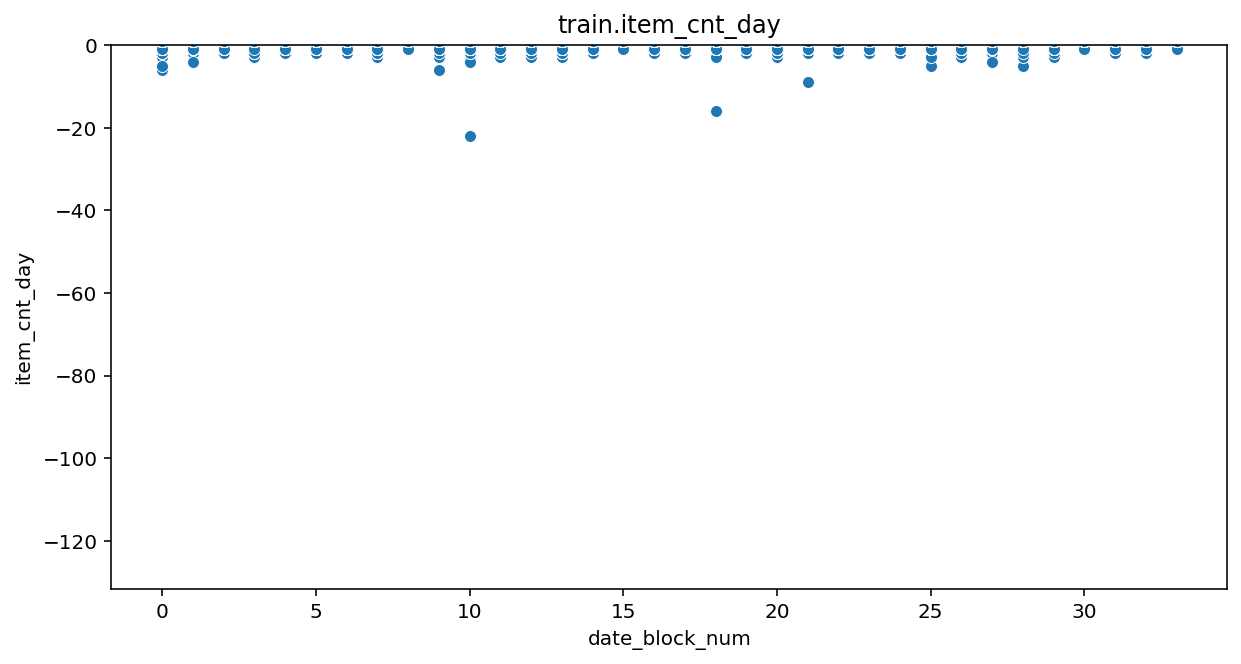

time: 6.03 s (started: 2021-02-10 14:56:24 +09:00)


In [40]:
fig, ax1 = plt.subplots(1, figsize=(10,5))
sns.scatterplot(data=train , x='date_block_num', y='item_cnt_day', ax=ax1)
ax1.set_ylim(top=0)
ax1.set_title('train.item_cnt_day')
plt.show()

- Î∞òÎåÄÎ°ú ÎÑàÎ¨¥ ÏûëÏùÄ Îç∞Ïù¥ÌÑ∞(ÏùåÏàò)Í∞Ä Ï°¥Ïû¨ÌïòÏòÄÎã§. Ïù¥Îäî Î∞òÌíà Îêú ÏÉÅÌíàÏúºÎ°ú ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏúºÎØÄÎ°ú, ÌäπÏù¥ÏπòÎùº ÌåêÎã®ÌïòÏó¨ ÏÇ≠Ï†úÌïòÏßÄ ÏïäÎäîÎã§.

## Ï†ÑÏ≤òÎ¶¨
---

### Í≤∞Ï∏°Ïπò ÌÉêÏÉâ

#### train
- train Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏ÌïòÍ≥†, Í∑∏Ïóê ÎåÄÌïú Ï≤òÎ¶¨Î•º ÏßÑÌñâÌïúÎã§.

In [ ]:
np.sum(pd.isnull(train))

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

time: 127 ms (started: 2021-02-10 01:07:18 +09:00)


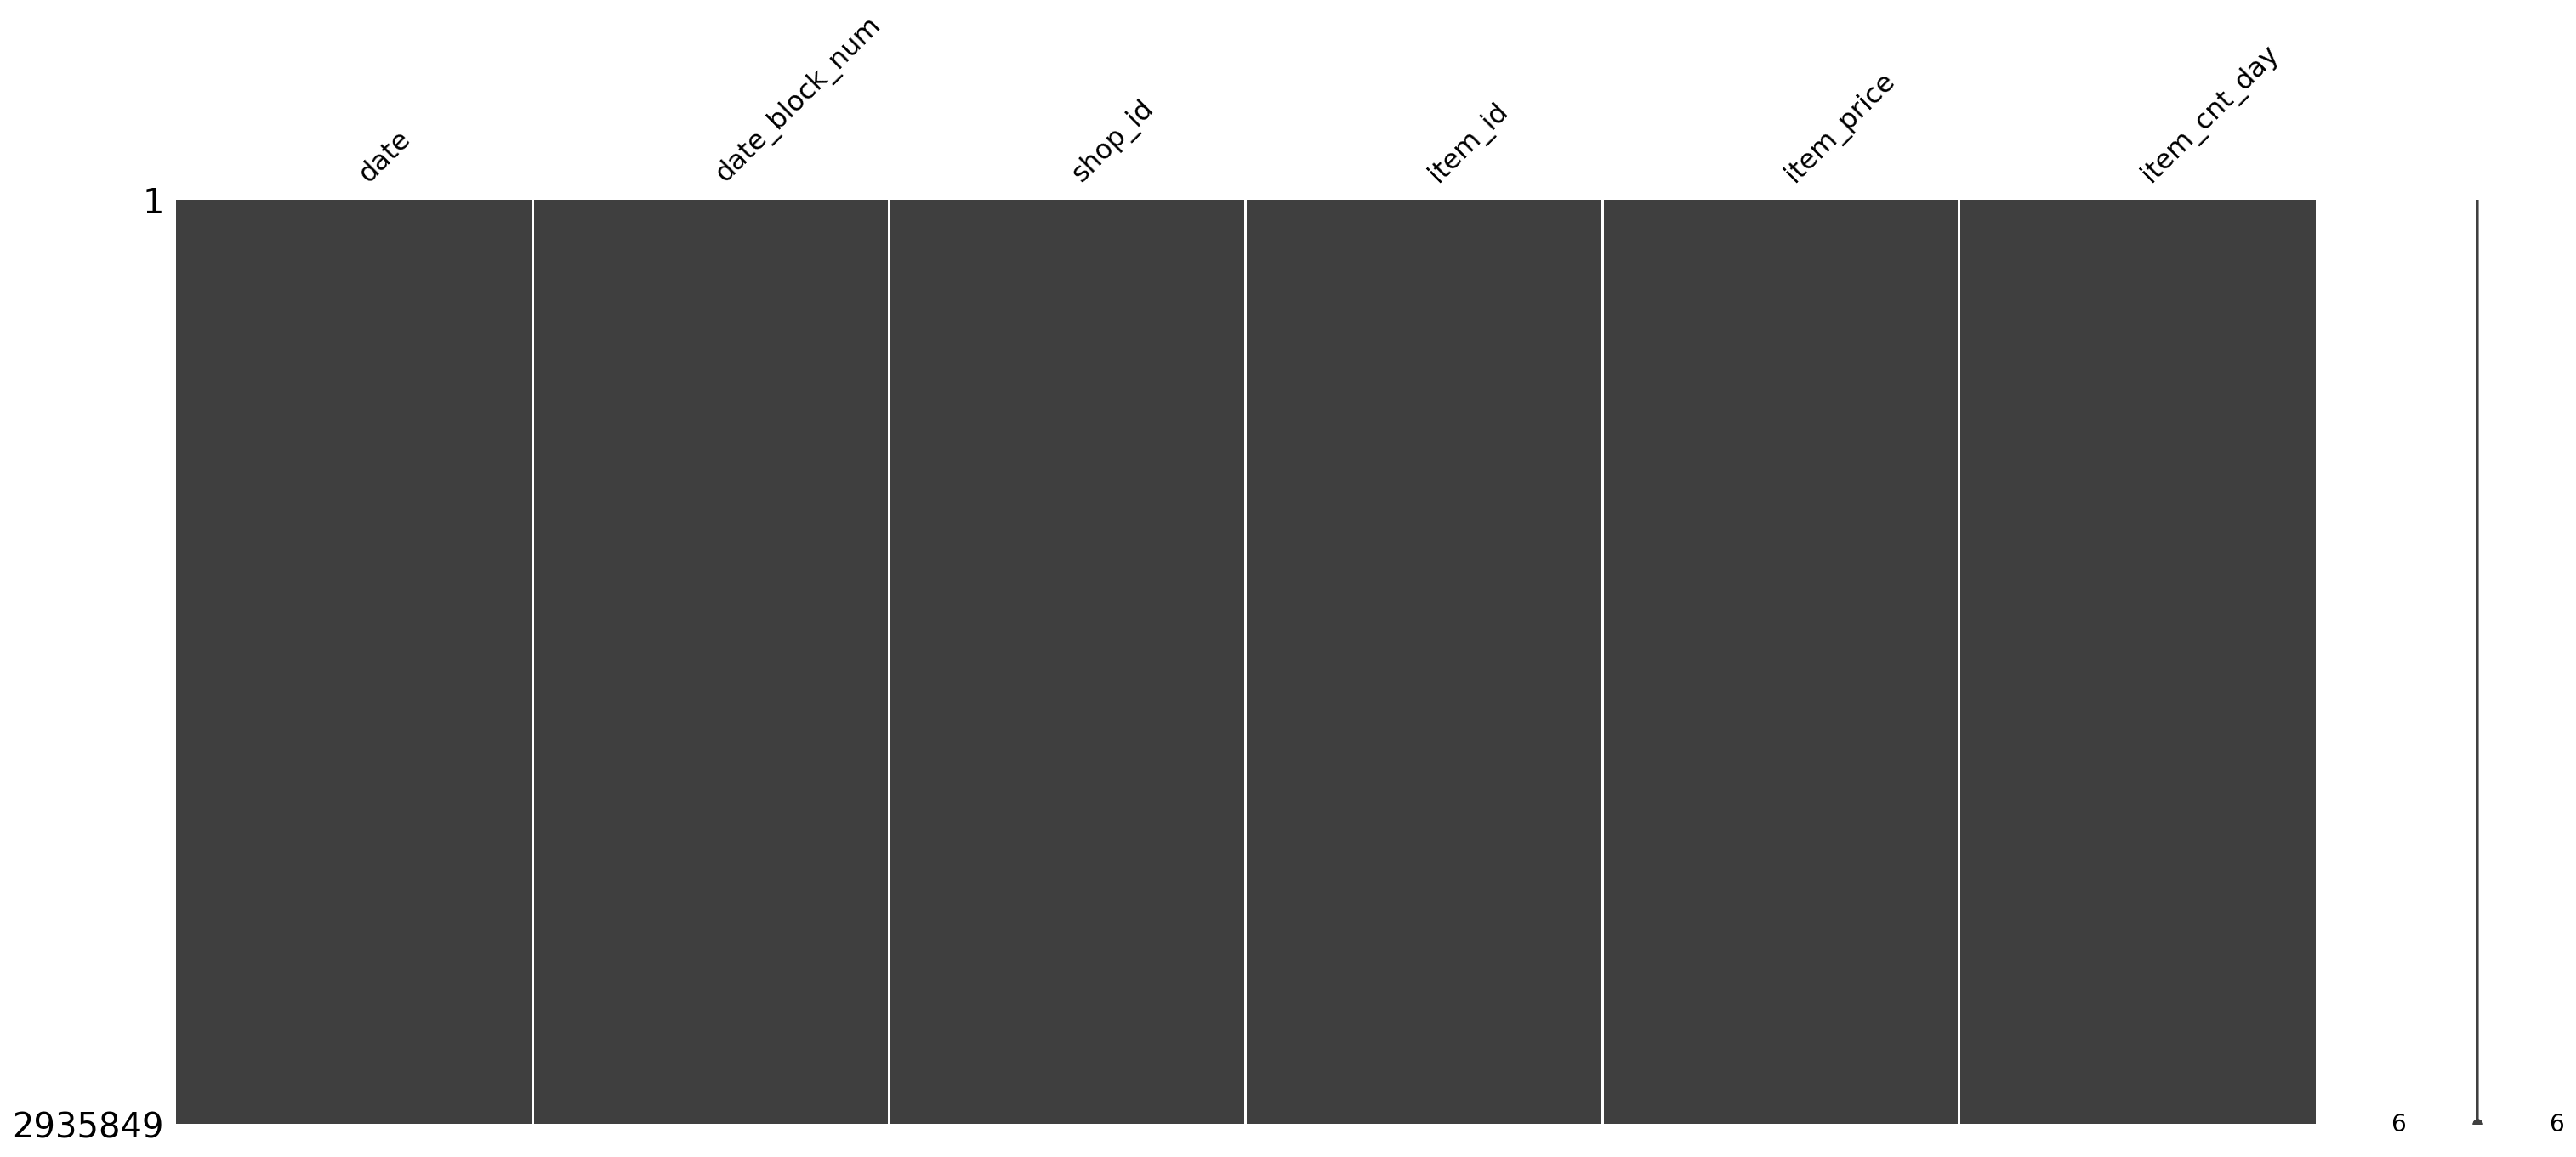

time: 4 s (started: 2021-02-10 01:07:19 +09:00)


In [ ]:
msno.matrix(train)

- train Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Í≤∞Ï∏°ÏπòÍ∞Ä ÌôïÏù∏ÎêòÏßÄ ÏïäÏïòÎã§.

#### test

In [ ]:
np.sum(pd.isnull(test))

ID         0
shop_id    0
item_id    0
dtype: int64

time: 4.11 ms (started: 2021-02-10 01:07:23 +09:00)


- test Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎèÑ Í≤∞Ï∏°ÏπòÍ∞Ä ÌôïÏù∏ÎêòÏßÄ ÏïäÏïòÎã§.

In [ ]:
train_ori = train.copy()

time: 49.8 ms (started: 2021-02-10 01:07:23 +09:00)


### Ïù¥ÏÉÅÏπò Î≥ÄÍ≤Ω

- ÎÑàÎ¨¥ ÎÜíÏùÄ `item_price`Î•º Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞

In [ ]:
high_price_row = train[train['item_price'] > 100000]
high_price_row

date  date_block_num  shop_id  item_id  item_price  \
1163158  13.12.2013              11       12     6066    307980.0   

         item_cnt_day  
1163158           1.0

time: 12.5 ms (started: 2021-02-10 08:24:06 +09:00)


In [ ]:
train_outlier_removed = train.drop(high_price_row.index)
train_outlier_removed[train_outlier_removed['item_price'] > 100000]

Empty DataFrame
Columns: [date, date_block_num, shop_id, item_id, item_price, item_cnt_day]
Index: []

time: 125 ms (started: 2021-02-10 08:24:06 +09:00)


- `item_price`Í∞Ä ÏùåÏàòÏù∏ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞

In [ ]:
minor_price_row = train_outlier_removed[train_outlier_removed['item_price'] < 0]
minor_price_row

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
484683  15.05.2013               4       32     2973        -1.0           1.0

time: 11.2 ms (started: 2021-02-10 08:24:09 +09:00)


In [ ]:
train_outlier_removed = train_outlier_removed.drop(minor_price_row.index)
train_outlier_removed[train_outlier_removed['item_price'] < 0]

Empty DataFrame
Columns: [date, date_block_num, shop_id, item_id, item_price, item_cnt_day]
Index: []

time: 230 ms (started: 2021-02-10 08:24:09 +09:00)


- ÎÑàÎ¨¥ ÎÜíÏùÄ `item_cnt_day`Î•º Í∞ÄÏßÄÎäî Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞

In [ ]:
high_cnt_row = train_outlier_removed[train_outlier_removed['item_cnt_day'] > 1000]
high_cnt_row

date  date_block_num  shop_id  item_id  item_price  \
2909818  28.10.2015              33       12    11373    0.908714   

         item_cnt_day  
2909818        2169.0

time: 10.2 ms (started: 2021-02-10 08:24:13 +09:00)


In [ ]:
train_outlier_removed = train_outlier_removed.drop(high_cnt_row.index)
train_outlier_removed[train_outlier_removed['item_cnt_day'] > 1000]

Empty DataFrame
Columns: [date, date_block_num, shop_id, item_id, item_price, item_cnt_day]
Index: []

time: 207 ms (started: 2021-02-10 08:24:13 +09:00)


### Î∂àÌïÑÏöîÌïú Column Ï†úÍ±∞

- train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú `date`Î•º Ï†úÍ±∞ÌïúÎã§.

In [ ]:
train_remove_column = train_outlier_removed.drop(['date'], axis=1)
train_remove_column

date_block_num  shop_id  item_id  item_price  item_cnt_day
0                     0       59    22154      999.00          1.00
1                     0       25     2552      899.00          1.00
2                     0       25     2552      899.00         -1.00
3                     0       25     2554     1709.05          1.00
4                     0       25     2555     1099.00          1.00
...                 ...      ...      ...         ...           ...
2935844              33       25     7409      299.00          1.00
2935845              33       25     7460      299.00          1.00
2935846              33       25     7459      349.00          1.00
2935847              33       25     7440      299.00          1.00
2935848              33       25     7460      299.00          1.00

[2935846 rows x 5 columns]

time: 51.5 ms (started: 2021-02-10 10:17:03 +09:00)


### train Îç∞Ïù¥ÌÑ∞ Í∑∏Î£πÌôî

- date_block_num, shop_id, item_idÎ•º Í∏∞Ï§ÄÏúºÎ°ú item_cnt_dayÎ•º ÎçîÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ aÏôÄ date_block_num, shop_id, item_idÎ•º Í∏∞Ï§ÄÏúºÎ°ú item_priceÎ•º ÌèâÍ∑†ÎÇ∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ bÎ•º Ìï©ÌïòÏó¨ ÏÉàÎ°úÏö¥ train Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïúÎã§.

In [ ]:
a = train_remove_column.groupby(['date_block_num','shop_id','item_id']).sum().reset_index()
a.head()

date_block_num  shop_id  item_id  item_price  item_cnt_day
0               0        0       32      884.00          6.00
1               0        0       33     1041.00          3.00
2               0        0       35      247.00          1.00
3               0        0       43      221.00          1.00
4               0        0       51      257.00          2.00

time: 632 ms (started: 2021-02-10 10:17:11 +09:00)


In [ ]:
b = train_remove_column.groupby(['date_block_num','shop_id','item_id']).mean().reset_index()
b.head()

date_block_num  shop_id  item_id  item_price  item_cnt_day
0               0        0       32      221.00          1.50
1               0        0       33      347.00          1.00
2               0        0       35      247.00          1.00
3               0        0       43      221.00          1.00
4               0        0       51      128.50          1.00

time: 589 ms (started: 2021-02-10 10:17:12 +09:00)


In [ ]:
train_merged = a.copy()
train_merged['item_price'] = b['item_price']
train_merged

date_block_num  shop_id  item_id  item_price  item_cnt_day
0                     0        0       32      221.00          6.00
1                     0        0       33      347.00          3.00
2                     0        0       35      247.00          1.00
3                     0        0       43      221.00          1.00
4                     0        0       51      128.50          2.00
...                 ...      ...      ...         ...           ...
1609118              33       59    22087      119.00          6.00
1609119              33       59    22088      119.00          2.00
1609120              33       59    22091      179.00          1.00
1609121              33       59    22100      629.00          1.00
1609122              33       59    22102     1250.00          1.00

[1609123 rows x 5 columns]

time: 28.4 ms (started: 2021-02-10 10:17:13 +09:00)


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
train_merged.describe()

date_block_num    shop_id    item_id  item_price  item_cnt_day
count      1609123.00 1609123.00 1609123.00  1609123.00    1609123.00
mean            14.66      32.81   10680.99      790.69          2.27
std              9.54      16.54    6238.88     1532.59          8.47
min              0.00       0.00       0.00        0.09        -22.00
25%              6.00      21.00    5045.00      199.00          1.00
50%             14.00      31.00   10497.00      399.00          1.00
75%             23.00      47.00   16060.00      898.50          2.00
max             33.00      59.00   22169.00    50999.00       1644.00

time: 267 ms (started: 2021-02-10 10:17:16 +09:00)


In [ ]:
train_merged[train_merged['item_cnt_day'] == 0]

date_block_num  shop_id  item_id  item_price  item_cnt_day
4147                  0        2     5643     2387.61          0.00
5609                  0        4     7218     1594.00          0.00
6558                  0        6     3676     2199.00          0.00
6566                  0        6     3778      899.00          0.00
6753                  0        6     5753     3490.00          0.00
...                 ...      ...      ...         ...           ...
1604609              33       52    18187      299.00          0.00
1605819              33       56     1538      999.00          0.00
1605876              33       56     3237     1998.00          0.00
1606537              33       56    19858      249.00          0.00
1607912              33       58     3115      349.00          0.00

[2583 rows x 5 columns]

time: 11.5 ms (started: 2021-02-10 10:17:20 +09:00)


In [ ]:
train_merged[train_merged['item_cnt_day'] < 0]

date_block_num  shop_id  item_id  item_price  item_cnt_day
5821                  0        4    12211     1399.00         -1.00
7326                  0        6    12283     1999.00         -1.00
11045                 0       12     1590     2599.00        -13.00
11046                 0       12     1592     3999.00         -1.00
11047                 0       12     1593     1799.00         -6.00
...                 ...      ...      ...         ...           ...
1590963              33       26    10513     1499.00         -1.00
1591278              33       26    21363     3199.00         -1.00
1595028              33       34     7233      599.00         -1.00
1602434              33       48     2860     1799.00         -1.00
1602603              33       48     6674    29990.00         -1.00

[915 rows x 5 columns]

time: 9.61 ms (started: 2021-02-10 10:17:21 +09:00)


In [ ]:
train_merged

date_block_num  shop_id  item_id  item_price  item_cnt_day
0                     0        0       32      221.00          6.00
1                     0        0       33      347.00          3.00
2                     0        0       35      247.00          1.00
3                     0        0       43      221.00          1.00
4                     0        0       51      128.50          2.00
...                 ...      ...      ...         ...           ...
1609118              33       59    22087      119.00          6.00
1609119              33       59    22088      119.00          2.00
1609120              33       59    22091      179.00          1.00
1609121              33       59    22100      629.00          1.00
1609122              33       59    22102     1250.00          1.00

[1609123 rows x 5 columns]

time: 8.54 ms (started: 2021-02-10 10:20:59 +09:00)


### ÌïÑÏöîÌïú column Ï∂îÍ∞Ä

In [ ]:
train_add_column = pd.merge(train_merged, items, left_on='item_id', right_on='item_id', how='left')
train_add_column = train_add_column.drop(['item_name'], axis=1)
train_add_column.head(10)

date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0               0        0       32      221.00          6.00   
1               0        0       33      347.00          3.00   
2               0        0       35      247.00          1.00   
3               0        0       43      221.00          1.00   
4               0        0       51      128.50          2.00   
5               0        0       61      195.00          1.00   
6               0        0       75       76.00          1.00   
7               0        0       88       76.00          1.00   
8               0        0       95      193.00          1.00   
9               0        0       96       70.00          1.00   

   item_category_id  
0                40  
1                37  
2                40  
3                40  
4                57  
5                43  
6                40  
7                40  
8                40  
9                40

time: 300 ms (started: 2021-02-10 10:21:09 +09:00)


In [ ]:
train_add_column = pd.merge(train_add_column, item_categories_eng, left_on='item_category_id', right_on='item_category_id', how='left')
train_add_column = train_add_column.drop(['item_category_name'], axis=1)
train_add_column.head()

date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0               0        0       32      221.00          6.00   
1               0        0       33      347.00          3.00   
2               0        0       35      247.00          1.00   
3               0        0       43      221.00          1.00   
4               0        0       51      128.50          2.00   

   item_category_id item_category_name_eng  
0                40            Movie - DVD  
1                37       Cinema - Blu-Ray  
2                40            Movie - DVD  
3                40            Movie - DVD  
4                57            Music - MP3

time: 239 ms (started: 2021-02-10 10:21:52 +09:00)


In [ ]:
train_add_column.loc[(train_add_column['item_category_name_eng']=='Service - Tickets'), 'item_category_name_eng'] = "Service_Tickets"
train_add_column[train_add_column['item_category_name_eng']=='Service_Tickets']

date_block_num  shop_id  item_id  item_price  item_cnt_day  \
1386174              27        6     9254     1100.00          1.00   
1386974              27        7     9250     1300.00          1.00   
1387980              27       12     9244      900.00          4.00   
1387981              27       12     9248     1300.00         13.00   
1387982              27       12     9252     1100.00          1.00   
...                 ...      ...      ...         ...           ...   
1574826              32       56     9250     1533.33         18.00   
1574827              32       56     9254     1320.00         19.00   
1577339              32       59     9246     1100.00          2.00   
1577340              32       59     9250     1500.00         12.00   
1577341              32       59     9254     1366.67          8.00   

         item_category_id item_category_name_eng  
1386174                80        Service_Tickets  
1386974                80        Service_Tickets  
1387980                80        Service_Tickets  
1387981                80        Service_Tickets  
1387982                80        Service_Tickets  
...                   ...                    ...  
1574826                80        Service_Tickets  
1574827                80        Service_Tickets  
1577339                80        Service_Tickets  
1577340                80        Service_Tickets  
1577341                80        Service_Tickets  

[298 rows x 7 columns]

time: 259 ms (started: 2021-02-10 10:22:46 +09:00)


In [ ]:
train_add_column['main_category_name'] = train_add_column.item_category_name_eng.str.split('-').str[0]
train_add_column = train_add_column.drop(['item_category_name_eng'], axis=1)
train_add_column.head(10)

date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0               0        0       32      221.00          6.00   
1               0        0       33      347.00          3.00   
2               0        0       35      247.00          1.00   
3               0        0       43      221.00          1.00   
4               0        0       51      128.50          2.00   
5               0        0       61      195.00          1.00   
6               0        0       75       76.00          1.00   
7               0        0       88       76.00          1.00   
8               0        0       95      193.00          1.00   
9               0        0       96       70.00          1.00   

   item_category_id main_category_name  
0                40             Movie   
1                37            Cinema   
2                40             Movie   
3                40             Movie   
4                57             Music   
5                43             Books   
6                40             Movie   
7                40             Movie   
8                40             Movie   
9                40             Movie

time: 3.17 s (started: 2021-02-10 10:22:54 +09:00)


In [ ]:
train_add_column['main_category_name'] = train_add_column['main_category_name'].str.replace(r' +', '')
train_add_column['main_category_name'] = train_add_column['main_category_name'].str.replace(r'(', '_')
train_add_column['main_category_name'] = train_add_column['main_category_name'].str.replace(r')', '')
train_add_column['main_category_name'] = train_add_column['main_category_name'].str.replace(r',', '_')
train_add_column.main_category_name.unique()

array(['Movie', 'Cinema', 'Music', 'Books', 'Programs', 'PCGames',
       'Gifts', 'Games', 'Accessories', 'Gameconsoles', 'Paymentcards',
       'Blankmedia_spire', 'Blankmedia_piece', 'Batteries', 'Service',
       'Deliveryofgoods', 'PC', 'Paymentcards_Cinema_Music_Games',
       'GameConsoles', 'Tickets_Number', 'MACGames', 'AndroidGames',
       'Service_Tickets', 'PaymentCards'], dtype=object)

time: 4.03 s (started: 2021-02-10 10:27:13 +09:00)


In [ ]:
train_encoded = pd.concat([train_add_column, pd.get_dummies(train_add_column['main_category_name'], prefix="main_category")],axis=1)
train_encoded = train_encoded.drop(['main_category_name'], axis=1)
train_encoded

date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0                     0        0       32      221.00          6.00   
1                     0        0       33      347.00          3.00   
2                     0        0       35      247.00          1.00   
3                     0        0       43      221.00          1.00   
4                     0        0       51      128.50          2.00   
...                 ...      ...      ...         ...           ...   
1609118              33       59    22087      119.00          6.00   
1609119              33       59    22088      119.00          2.00   
1609120              33       59    22091      179.00          1.00   
1609121              33       59    22100      629.00          1.00   
1609122              33       59    22102     1250.00          1.00   

         item_category_id  main_category_Accessories  \
0                      40                          0   
1                      37                          0   
2                      40                          0   
3                      40                          0   
4                      57                          0   
...                   ...                        ...   
1609118                83                          0   
1609119                83                          0   
1609120                83                          0   
1609121                42                          0   
1609122                42                          0   

         main_category_AndroidGames  main_category_Batteries  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   
...                             ...                      ...   
1609118                           0                        1   
1609119                           0                        1   
1609120                           0                        1   
1609121                           0                        0   
1609122                           0                        0   

         main_category_Blankmedia_piece  ...  main_category_Music  \
0                                     0  ...                    0   
1                                     0  ...                    0   
2                                     0  ...                    0   
3                                     0  ...                    0   
4                                     0  ...                    1   
...                                 ...  ...                  ...   
1609118                               0  ...                    0   
1609119                               0  ...                    0   
1609120                               0  ...                    0   
1609121                               0  ...                    0   
1609122                               0  ...                    0   

         main_category_PC  main_category_PCGames  main_category_PaymentCards  \
0                       0                      0                           0   
1                       0                      0                           0   
2                       0                      0                           0   
3                       0                      0                           0   
4                       0                      0                           0   
...                   ...                    ...                         ...   
1609118                 0                      0                           0   
1609119                 0                      0                           0   
1609120                 0                      0                           0   
1609121                 0                      0                           0   
16091

time: 560 ms (started: 2021-02-10 10:29:13 +09:00)


### train Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏

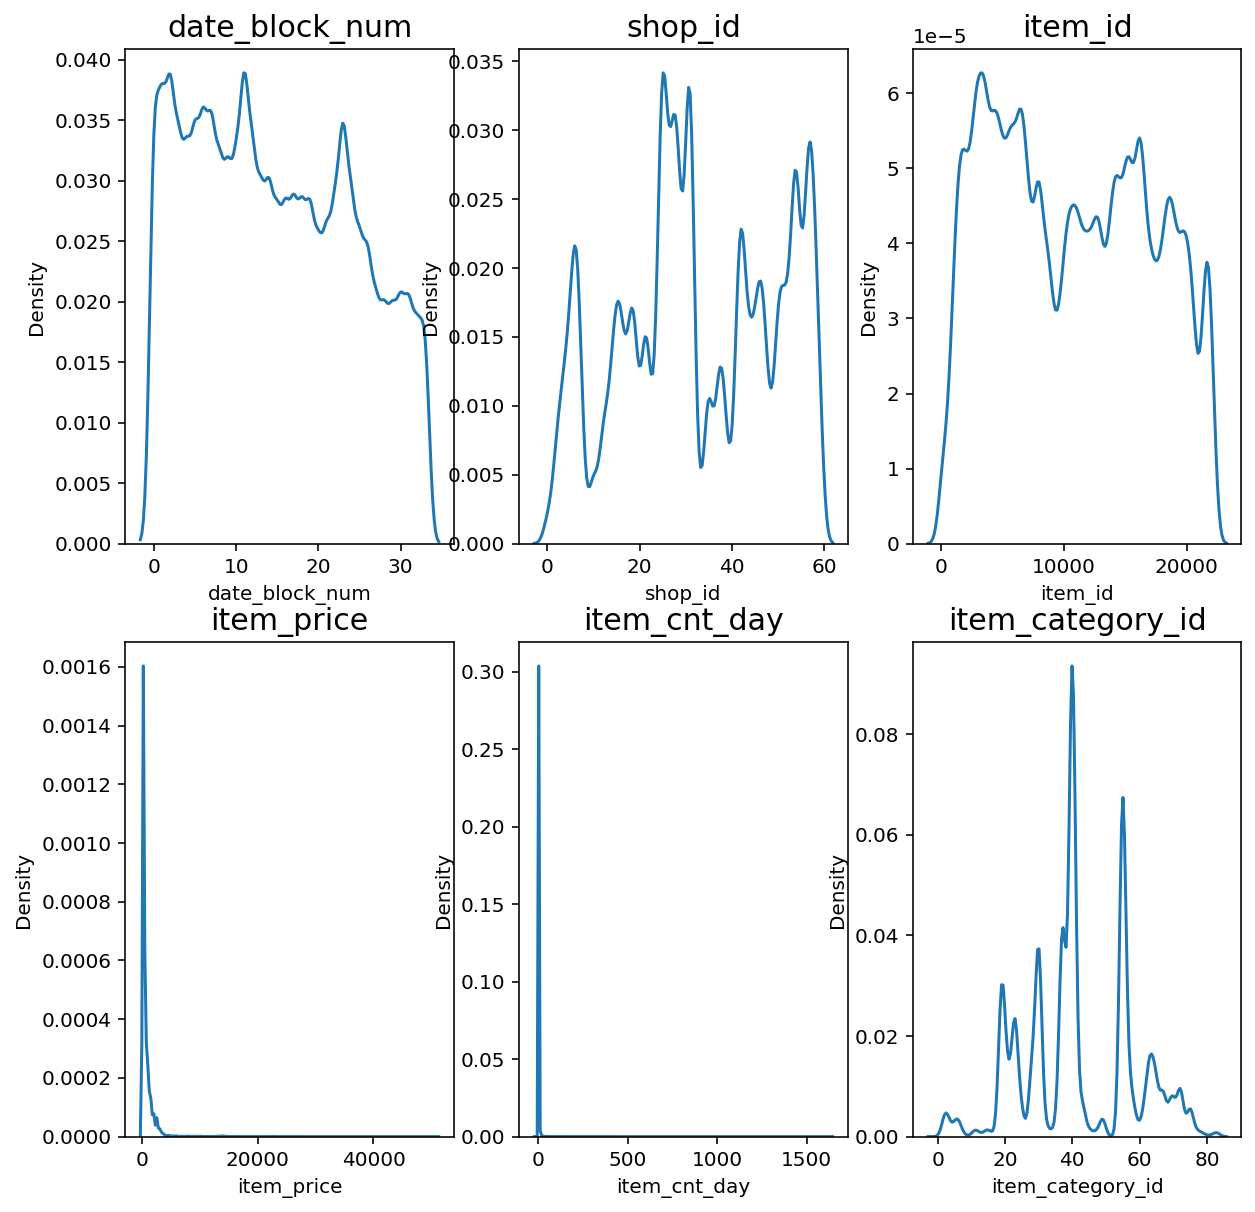

time: 36.7 s (started: 2021-02-10 10:29:36 +09:00)


In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10)) 

count = 0
columns = train_encoded.columns
for row in range(2):
    for col in range(3):
        sns.kdeplot(train_encoded[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 6 :
            break

- `item_cnt_day` Îç∞Ïù¥ÌÑ∞Í∞Ä Ìïú Ï™ΩÏúºÎ°ú ÏπòÏö∞Ï≥êÏßÑ Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥Í≥† ÏûàÎã§.
- `item_cnt_day`Ïóê ÎåÄÌïòÏó¨ log-scalingÏùÑ ÏßÑÌñâÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º Í≥†Î•¥Í≤å Î≥ÄÌôîÏãúÏºú Ï§ÄÎã§.

In [ ]:
def safe_log1p(x):
    return np.array([ np.log1p(i) if i > 0 else 0 for i in x])

time: 419 ¬µs (started: 2021-02-10 10:30:16 +09:00)


In [ ]:
train_log = train_encoded.copy()
train_log['item_cnt_day'] = safe_log1p(train_log['item_cnt_day'].values)

time: 2.65 s (started: 2021-02-10 10:30:18 +09:00)


In [ ]:
train_log = train_encoded.copy()
train_log['item_cnt_day'] = safe_log1p(train_log['item_cnt_day'].values)
train_log['item_price'] = safe_log1p(train_log['item_price'].values)

time: 5.47 s (started: 2021-02-10 10:30:21 +09:00)


/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


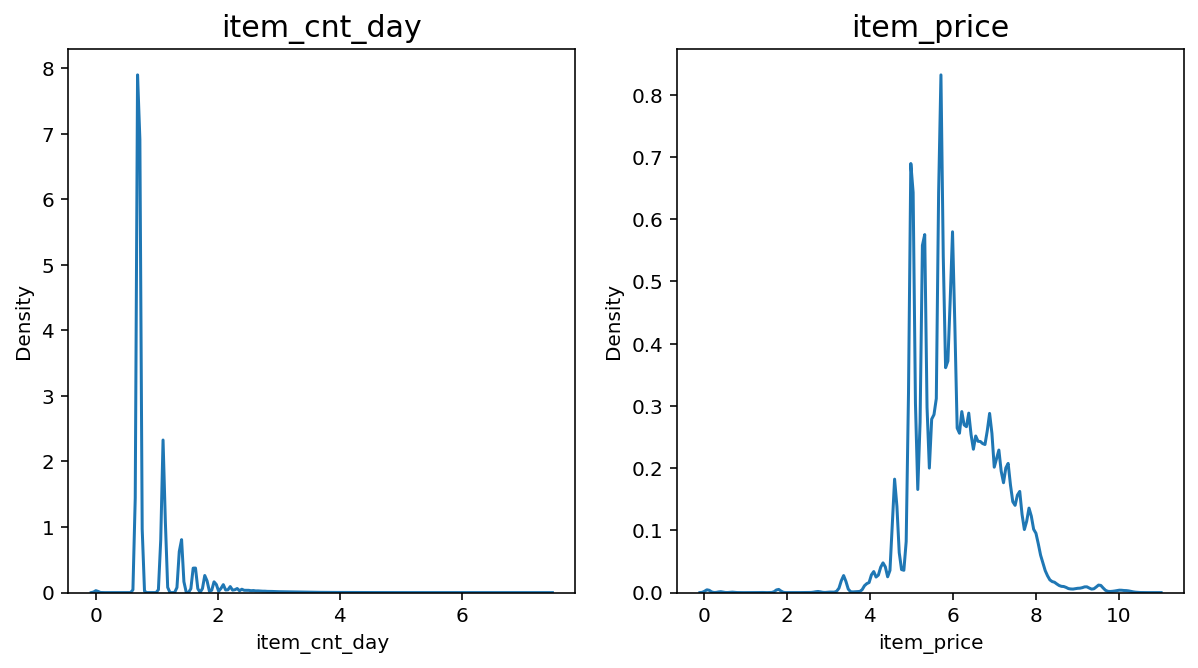

time: 11.7 s (started: 2021-02-10 10:30:31 +09:00)


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
sns.kdeplot(train_log['item_cnt_day'], ax=ax1)
ax1.set_title('item_cnt_day', fontsize=15)

sns.kdeplot(train_log['item_price'], ax=ax2)
ax2.set_title('item_price', fontsize=15)
fig.show()

### train Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [ ]:
y = train_log['item_cnt_day']
x_train = train_log.drop(['item_cnt_day'], axis=1)

print(x_train.columns)

Index(['date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_category_id', 'main_category_Accessories',
       'main_category_AndroidGames', 'main_category_Batteries',
       'main_category_Blankmedia_piece', 'main_category_Blankmedia_spire',
       'main_category_Books', 'main_category_Cinema',
       'main_category_Deliveryofgoods', 'main_category_GameConsoles',
       'main_category_Gameconsoles', 'main_category_Games',
       'main_category_Gifts', 'main_category_MACGames', 'main_category_Movie',
       'main_category_Music', 'main_category_PC', 'main_category_PCGames',
       'main_category_PaymentCards', 'main_category_Paymentcards',
       'main_category_Paymentcards_Cinema_Music_Games',
       'main_category_Programs', 'main_category_Service',
       'main_category_Service_Tickets', 'main_category_Tickets_Number'],
      dtype='object')
time: 47.7 ms (started: 2021-02-10 10:30:46 +09:00)


In [ ]:
train_path = join(data_dir, 'train_log_main_category.csv')
train_log.to_csv(train_path, index=False)
print(train_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/1.data/train_log_main_category.csv
time: 10.5 s (started: 2021-02-10 10:31:00 +09:00)


### Test Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ

#### Test column Ï∂îÍ∞Ä/ÏÇ≠Ï†ú

- test Îç∞Ïù¥ÌÑ∞Ïóê `date_block_num` columnÏùÑ Ï∂îÍ∞ÄÌïòÍ≥† Î™®Îì† Í∞íÏùÄ 34Î°ú Ï±ÑÏö¥Îã§.
- `item_category_id`Î•º Ï∂îÍ∞ÄÌïúÎã§.
- `ID`Î•º Î≥ÄÏàò `sub_id`Ïóê Ï†ÄÏû•ÌïòÍ≥†, IDÎ•º testÏóêÏÑú Ï†úÍ±∞ÌïúÎã§.

In [ ]:
test_merge = test.copy()
test_merge["date_block_num"] = 34

sub_id = test_merge["ID"]
test_merge = test_merge.drop(['ID'], axis=1)

time: 5.95 ms (started: 2021-02-10 08:58:55 +09:00)


In [ ]:
test_merge = pd.merge(test_merge, items, left_on='item_id', right_on='item_id', how='left')
test_merge = test_merge.drop(['item_name'], axis=1)

time: 36.5 ms (started: 2021-02-10 08:58:55 +09:00)


In [ ]:
test_merge

shop_id  item_id  date_block_num  item_category_id
0             5     5037              34                19
1             5     5320              34                55
2             5     5233              34                19
3             5     5232              34                23
4             5     5268              34                20
...         ...      ...             ...               ...
214195       45    18454              34                55
214196       45    16188              34                64
214197       45    15757              34                55
214198       45    19648              34                40
214199       45      969              34                37

[214200 rows x 4 columns]

time: 7.98 ms (started: 2021-02-10 10:33:11 +09:00)


#### Test column Ï∂îÍ∞Ä - price

1. Í∞ôÏùÄ shop_id, item_idÎ•º Í∞ÄÏßÄÎäî Ìï≠Î™©Ïùò ÌèâÍ∑†

In [ ]:
price_candidate_1 = train_log.groupby(['item_id', 'shop_id']).mean().reset_index().iloc[:, :6]
price_candidate_1 = price_candidate_1.drop(['date_block_num', 'item_cnt_day', 'item_category_id'], axis=1)
price_candidate_1

item_id  shop_id  item_price
0             0       54        4.08
1             1       55        8.41
2             2       54        4.08
3             3       54        4.35
4             4       54        4.08
...         ...      ...         ...
424118    22168       12        6.68
424119    22168       16        6.68
424120    22168       42        6.68
424121    22168       43        6.68
424122    22169       25        8.38

[424123 rows x 3 columns]

time: 1.25 s (started: 2021-02-10 10:37:29 +09:00)


In [ ]:
test_1 = pd.merge(test_merge, price_candidate_1, on=['item_id','shop_id'], how='left')
test_1

shop_id  item_id  date_block_num  item_category_id  item_price
0             5     5037              34                19        7.36
1             5     5320              34                55         nan
2             5     5233              34                19        6.72
3             5     5232              34                23        6.40
4             5     5268              34                20         nan
...         ...      ...             ...               ...         ...
214195       45    18454              34                55        5.16
214196       45    16188              34                64         nan
214197       45    15757              34                55        5.30
214198       45    19648              34                40         nan
214199       45      969              34                37        6.31

[214200 rows x 5 columns]

time: 83.2 ms (started: 2021-02-10 10:37:38 +09:00)


2. Í∞ôÏùÄ category Í∞ôÏùÄ shop_idÏùò ÌèâÍ∑†

In [ ]:
price_candidate_2 = train_log.groupby(['item_category_id', 'shop_id']).mean().reset_index().iloc[:, :6]
price_candidate_2 = price_candidate_2.drop(['date_block_num', 'item_id','item_cnt_day'], axis=1)
price_candidate_2

item_category_id  shop_id  item_price
0                    0        0        4.54
1                    0       25        5.00
2                    0       38        3.15
3                    1        0        5.65
4                    1       45        5.00
...                ...      ...         ...
3266                83       54        4.63
3267                83       56        4.62
3268                83       57        4.72
3269                83       58        4.74
3270                83       59        4.62

[3271 rows x 3 columns]

time: 405 ms (started: 2021-02-10 10:38:37 +09:00)


In [ ]:
def update_price_2(x):
    if pd.isna(x['item_price']):
        search_res = price_candidate_2.loc[(price_candidate_2['item_category_id'] == x['item_category_id']) & 
                                (price_candidate_2['shop_id'] == x['shop_id'])].values
        if len(search_res) > 0: return search_res[0][2]
    return x['item_price']

time: 1.97 ms (started: 2021-02-10 10:38:48 +09:00)


In [ ]:
test_2 = test_1.copy()
test_2['item_price'] = test_2.apply(update_price_2, axis=1)
test_2

shop_id  item_id  date_block_num  item_category_id  item_price
0             5     5037              34                19        7.36
1             5     5320              34                55        5.61
2             5     5233              34                19        6.72
3             5     5232              34                23        6.40
4             5     5268              34                20        7.79
...         ...      ...             ...               ...         ...
214195       45    18454              34                55        5.16
214196       45    16188              34                64        6.88
214197       45    15757              34                55        5.30
214198       45    19648              34                40        5.40
214199       45      969              34                37        6.31

[214200 rows x 5 columns]

time: 1min 24s (started: 2021-02-10 10:39:06 +09:00)


In [ ]:
np.sum(pd.isnull(test_2))

shop_id                 0
item_id                 0
date_block_num          0
item_category_id        0
item_price          24137
dtype: int64

time: 6.68 ms (started: 2021-02-10 10:41:00 +09:00)


In [ ]:
test_1_nan_index = test_1['item_price'].isnull()
test_2[test_1_nan_index]

shop_id  item_id  date_block_num  item_category_id  item_price
1             5     5320              34                55        5.61
4             5     5268              34                20        7.79
9             5     5003              34                20        7.79
16            5     4874              34                72        7.06
21            5     5002              34                19        7.08
...         ...      ...             ...               ...         ...
214188       45     9500              34                40        5.40
214189       45    16007              34                64        6.88
214194       45    18027              34                70        5.72
214196       45    16188              34                64        6.88
214198       45    19648              34                40        5.40

[102796 rows x 5 columns]

time: 11.4 ms (started: 2021-02-10 10:41:02 +09:00)


3. Í∞ôÏùÄ categoryÏùò price ÌèâÍ∑†

In [ ]:
price_candidate_3 = train_log.groupby(['item_category_id']).mean().reset_index().iloc[:, :6]
price_candidate_3 = price_candidate_3.drop(['date_block_num', 'shop_id', 'item_id', 'item_cnt_day'], axis=1)
price_candidate_3

item_category_id  item_price
0                  0        4.23
1                  1        5.33
2                  2        7.59
3                  3        7.33
4                  4        5.92
..               ...         ...
79                79        6.70
80                80        7.06
81                81        5.27
82                82        3.44
83                83        4.65

[84 rows x 2 columns]

time: 382 ms (started: 2021-02-10 10:41:07 +09:00)


In [ ]:
def update_price_3(x):
    if pd.isna(x['item_price']):
        search_res = price_candidate_3.loc[(price_candidate_3['item_category_id'] == x['item_category_id'])].values
        if len(search_res) > 0: return search_res[0][1]
    return x['item_price']

time: 448 ¬µs (started: 2021-02-10 10:41:12 +09:00)


In [ ]:
test_3 = test_2.copy()
test_3['item_price'] = test_3.apply(update_price_3, axis=1)
test_3

shop_id  item_id  date_block_num  item_category_id  item_price
0             5     5037              34                19        7.36
1             5     5320              34                55        5.61
2             5     5233              34                19        6.72
3             5     5232              34                23        6.40
4             5     5268              34                20        7.79
...         ...      ...             ...               ...         ...
214195       45    18454              34                55        5.16
214196       45    16188              34                64        6.88
214197       45    15757              34                55        5.30
214198       45    19648              34                40        5.40
214199       45      969              34                37        6.31

[214200 rows x 5 columns]

time: 17.1 s (started: 2021-02-10 10:41:13 +09:00)


In [ ]:
np.sum(pd.isnull(test_3))

shop_id             0
item_id             0
date_block_num      0
item_category_id    0
item_price          0
dtype: int64

time: 4.71 ms (started: 2021-02-10 10:41:30 +09:00)


In [ ]:
test_2_nan_index = test_2['item_price'].isnull()
test_3[test_2_nan_index]

shop_id  item_id  date_block_num  item_category_id  item_price
200           5     6731              34                31        5.47
550           5     3022              34                31        5.47
612           5     1884              34                31        5.47
613           5     1885              34                31        5.47
683           5     3349              34                31        5.47
...         ...      ...             ...               ...         ...
213832       45     3219              34                76        7.16
213833       45     3002              34                76        7.16
213834       45     2987              34                76        7.16
213835       45     2944              34                31        5.47
214161       45     1867              34                31        5.47

[24137 rows x 5 columns]

time: 9.28 ms (started: 2021-02-10 10:41:30 +09:00)


#### category nameÏôÄ main_category Ï∂îÍ∞Ä

In [ ]:
test_merged = pd.merge(test_3, item_categories_eng, left_on='item_category_id', right_on='item_category_id', how='left')
test_merged = test_merged.drop(['item_category_name'], axis=1)
test_merged.head(10)

shop_id  item_id  date_block_num  item_category_id  item_price  \
0        5     5037              34                19        7.36   
1        5     5320              34                55        5.61   
2        5     5233              34                19        6.72   
3        5     5232              34                23        6.40   
4        5     5268              34                20        7.79   
5        5     5039              34                23        7.47   
6        5     5041              34                20        8.27   
7        5     5046              34                55        5.78   
8        5     5319              34                55        5.70   
9        5     5003              34                20        7.79   

        item_category_name_eng  
0                  Games - PS3  
1  Music - locally produced CD  
2                  Games - PS3  
3             Games - XBOX 360  
4                  Games - PS4  
5             Games - XBOX 360  
6                  Games - PS4  
7  Music - locally produced CD  
8  Music - locally produced CD  
9                  Games - PS4

time: 41.6 ms (started: 2021-02-10 10:42:52 +09:00)


In [ ]:
test_merged.loc[(test_merged['item_category_name_eng']=='Service - Tickets'), 'item_category_name_eng'] = "Service_Tickets"
test_merged[test_merged['item_category_name_eng']=='Service_Tickets']

Empty DataFrame
Columns: [shop_id, item_id, date_block_num, item_category_id, item_price, item_category_name_eng]
Index: []

time: 49.6 ms (started: 2021-02-10 10:42:58 +09:00)


In [ ]:
test_merged['main_category_name'] = test_merged.item_category_name_eng.str.split('-').str[0]
test_merged = test_merged.drop(['item_category_name_eng'], axis=1)
test_merged.head(10)

shop_id  item_id  date_block_num  item_category_id  item_price  \
0        5     5037              34                19        7.36   
1        5     5320              34                55        5.61   
2        5     5233              34                19        6.72   
3        5     5232              34                23        6.40   
4        5     5268              34                20        7.79   
5        5     5039              34                23        7.47   
6        5     5041              34                20        8.27   
7        5     5046              34                55        5.78   
8        5     5319              34                55        5.70   
9        5     5003              34                20        7.79   

  main_category_name  
0             Games   
1             Music   
2             Games   
3             Games   
4             Games   
5             Games   
6             Games   
7             Music   
8             Music   
9             Games

time: 488 ms (started: 2021-02-10 10:43:02 +09:00)


In [ ]:
test_merged['main_category_name'] = test_merged['main_category_name'].str.replace(r' +', '')
test_merged['main_category_name'] = test_merged['main_category_name'].str.replace(r'(', '_')
test_merged['main_category_name'] = test_merged['main_category_name'].str.replace(r')', '')
test_merged['main_category_name'] = test_merged['main_category_name'].str.replace(r',', '_')
test_merged.main_category_name.unique()

array(['Games', 'Music', 'PCGames', 'Gifts', 'Paymentcards',
       'Accessories', 'Movie', 'Cinema', 'Books', 'Gameconsoles',
       'Service', 'Programs', 'Batteries', 'Deliveryofgoods', 'PC',
       'PaymentCards', 'MACGames', 'AndroidGames'], dtype=object)

time: 581 ms (started: 2021-02-10 10:43:39 +09:00)


In [ ]:
test_merged = pd.concat([test_merged, pd.get_dummies(test_merged['main_category_name'], prefix="main_category")],axis=1)
test_merged

shop_id  item_id  date_block_num  item_category_id  item_price  \
0             5     5037              34                19        7.36   
1             5     5320              34                55        5.61   
2             5     5233              34                19        6.72   
3             5     5232              34                23        6.40   
4             5     5268              34                20        7.79   
...         ...      ...             ...               ...         ...   
214195       45    18454              34                55        5.16   
214196       45    16188              34                64        6.88   
214197       45    15757              34                55        5.30   
214198       45    19648              34                40        5.40   
214199       45      969              34                37        6.31   

       main_category_name  main_category_Accessories  \
0                   Games                          0   
1                   Music                          0   
2                   Games                          0   
3                   Games                          0   
4                   Games                          0   
...                   ...                        ...   
214195              Music                          0   
214196              Gifts                          0   
214197              Music                          0   
214198              Movie                          0   
214199             Cinema                          0   

        main_category_AndroidGames  main_category_Batteries  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
214195                           0                        0   
214196                           0                        0   
214197                           0                        0   
214198                           0                        0   
214199                           0                        0   

        main_category_Books  ...  main_category_Gifts  main_category_MACGames  \
0                         0  ...                    0                       0   
1                         0  ...                    0                       0   
2                         0  ...                    0                       0   
3                         0  ...                    0                       0   
4                         0  ...                    0                       0   
...                     ...  ...                  ...                     ...   
214195                    0  ...                    0                       0   
214196                    0  ...                    1                       0   
214197                    0  ...                    0                       0   
214198                    0  ...                    0                       0   
214199                    0  ...                    0                       0   

        main_category_Movie  main_category_Music  main_category_PC  \
0                         0                    0                 0   
1                         0                    1                 0   
2                         0                    0                 0   
3                         0                    0                 0   
4                         0                    0                 0   
...                     ...                  ...               ...   
214195                    0                    1                 0   
214196                    0                    0                 0   
214197                    0                    1                 0   
214198          

time: 106 ms (started: 2021-02-10 10:45:17 +09:00)


In [ ]:
main_category_list = train_log.columns[6:]

columns = test_merged.columns
for c in main_category_list:
    if c not in columns: test_merged[c] = 0

time: 8.22 ms (started: 2021-02-10 10:46:54 +09:00)


In [ ]:
test_merged = test_merged.drop(['main_category_name'], axis=1)
test_merged.head(10)

shop_id  item_id  date_block_num  item_category_id  item_price  \
0        5     5037              34                19        7.36   
1        5     5320              34                55        5.61   
2        5     5233              34                19        6.72   
3        5     5232              34                23        6.40   
4        5     5268              34                20        7.79   
5        5     5039              34                23        7.47   
6        5     5041              34                20        8.27   
7        5     5046              34                55        5.78   
8        5     5319              34                55        5.70   
9        5     5003              34                20        7.79   

   main_category_Accessories  main_category_AndroidGames  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   
5                          0                           0   
6                          0                           0   
7                          0                           0   
8                          0                           0   
9                          0                           0   

   main_category_Batteries  main_category_Books  main_category_Cinema  ...  \
0                        0                    0                     0  ...   
1                        0                    0                     0  ...   
2                        0                    0                     0  ...   
3                        0                    0                     0  ...   
4                        0                    0                     0  ...   
5                        0                    0                     0  ...   
6                        0                    0                     0  ...   
7                        0                    0                     0  ...   
8                        0                    0                     0  ...   
9                        0                    0                     0  ...   

   main_category_PaymentCards  main_category_Paymentcards  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   
6                           0                           0   
7                           0                           0   
8                           0                           0   
9                           0                           0   

   main_category_Programs  main_category_Service  \
0                       0                      0   
1                       0                      0   
2                       0                      0   
3                       0                      0   
4                       0                      0   
5                       0                      0   
6                       0                      0   
7                       0                      0   
8                       0                      0   
9                       0                      0   

   main_category_Blankmedia_piece  main_category_Blankmedia_spire  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   
5                               0                               

time: 32.6 ms (started: 2021-02-10 10:47:00 +09:00)


#### Ï†ïÏ†úÎêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•

In [ ]:
test_merged_path = join(data_dir, 'test_main_category.csv')
test_merged.to_csv(test_merged_path, index=False)
print(test_merged_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/1.data/test_main_category.csv
time: 1.06 s (started: 2021-02-10 10:47:09 +09:00)


- Ïù¥Ï†ú Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏôÄÏÑú ÏÇ¨Ïö©Ìï† Í≤ÉÏù¥Îã§!

In [ ]:
test = pd.read_csv(join(data_dir, 'test_main_category.csv'))

train_merged_log = pd.read_csv(join(data_dir, 'train_log_main_category.csv'))
y = train_merged_log['item_cnt_day']
x_train = train_merged_log.drop(['item_cnt_day'], axis=1)

print(f'x_train shape : {x_train.shape}')
print(f'y shape : {y.shape}')
print(f'test shape : {test.shape}')

x_train shape : (1609123, 29)
y shape : (1609123,)
test shape : (214200, 29)
time: 2.65 s (started: 2021-02-10 12:53:02 +09:00)


## Î™®Îç∏ ÏÑ†Ï†ï Î∞è ÌïôÏäµ

### ÏàòÌù¨

#### ÏÑ§Í≥Ñ
ÌöåÍ∑ÄÎ™®Îç∏(lightgbm)ÏùÑ Ï†ÅÏö©ÌïòÏó¨ Îã§ÏùåÎã¨Ïùò ÌåêÎß§ÎüâÏùÑ ÏòàÏ∏°Ìï¥ Î≥¥Í≥†Ïûê ÌïúÎã§.<br/>

1. Grid search + average blending
  - Í∑∏Î¶¨Îìú ÏÑúÏπòÎ•º ÌÜµÌïòÏó¨ Í∞Å Î™®Îç∏Ïóê ÎåÄÌïú ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎ¶¨ÌÑ∞Î•º ÌÉêÏÉâÌïúÎã§.
  - Ï∞æÏïÑÎÇ∏ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ Í∞Å Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥† average blendingÏùÑ ÌÜµÌïòÏó¨ ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º ÎèÑÏ∂úÌïúÎã§.
  - ÏÇ¨Ïö©Îêú Ìï®ÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÎã§.
    - `get_hy_by_gride_search(model, param_grid, x_train, y, verbose=2, n_jobs=5, cv=5)` : Îã®Ïùº Î™®Îç∏Ïóê ÎåÄÌïú grid searchÎ•º ÏàòÌñâÌïòÏó¨, ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Î∞òÌôòÌïúÎã§.
    - `train_models(x_train, y, test, hps)`: ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï†ïÎ≥¥Î•º Î∞õÏïÑ Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥† ÏòàÏ∏°Í≤∞Í≥ºÎ•º Î∞òÌôòÌïúÎã§.
    - `averaging_blending(predictions)` : ÏòàÏ∏° Í≤∞Í≥ºÎì§ÏùÑ ÏûÖÎ†•Î∞õÏïÑ average blendingÏùÑ ÌïòÍ≥† Í≤∞Í≥ºÎ•º Î∞òÌôòÌïúÎã§.
    - `modeling(models, x_tain, y, test, verbose=2, n_jobs=5, cv=5)` : ÏúÑ Ìï®ÏàòÎì§ÏùÑ ÌÜµÌï©ÌïòÏó¨, ÎåÄÏÉÅ Î™®Îç∏ Ï†ïÎ≥¥Î•º ÏûÖÎ†•Î∞õÏïÑ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ search + average blending Îêú ÏòàÏ∏°Í∞íÏùÑ Î∞òÌôòÌïúÎã§.


2. lightgbm
  - ÏúÑÏùò Î∞©ÏãùÏùÑ ÏÇ¨Ïö©Ìï† Îïå, GradientBoostingRegressor, XGBRegressor, LGBMRegressor ÏÑ∏Í∞ÄÏßÄ Î™®Îç∏ÏùÑ Ï§ëÏ†êÏúºÎ°ú Ïã§ÌóòÏùÑ ÏßÑÌñâÌïòÏòÄÎã§.
  - ÌïòÏßÄÎßå, GradientBoostingRegressorÏôÄ XGBRegressorÏùò ÌïôÏäµ ÏÜçÎèÑÍ∞Ä ÎÑàÎ¨¥ Îä¶Ïñ¥ ÏßÑÌñâÏóê Ïñ¥Î†§ÏõÄÏùÑ Í≤™ÏóàÍ≥† Í∞ÄÏû• Îπ†Î•¥Í≤å ÌïôÏäµÏù¥ ÎêòÎäî LGBMRegressorÎßåÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ÏÑú Í≤∞Í≥º ÎèÑÏ∂úÏùÑ ÏãúÎèÑÌïòÏòÄÎã§.

In [ ]:
from sklearn.linear_model import LinearRegression # ÏùºÎ∞ò ÌöåÍ∑Ä Î™®Îç∏
from sklearn.linear_model import Ridge, Lasso, ElasticNet # norm Í∑úÏ†ú ÌöåÍ∏∞ Î™®Îç∏
from sklearn.linear_model import ARDRegression, BayesianRidge # Î≤†Ïù¥ÏßÄÏïà ÌöåÍ∑Ä
from sklearn.ensemble import RandomForestRegressor # ÏïôÏÉÅÎ∏î Î™®Îç∏, bagging
from sklearn.ensemble import GradientBoostingRegressor # ÏïôÏÉÅÎ∏î Î™®Îç∏, boosting
import xgboost as xgb # ÏïôÏÉÅÎ∏î Î™®Îç∏, boosting
import lightgbm as lgb # ÏïôÏÉÅÎ∏î Î™®Îç∏, boosting
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

rs = 2021

time: 146 ms (started: 2021-02-10 12:53:05 +09:00)


#### Ï†ÑÏ≤òÎ¶¨ Îç∞Ïù¥ÌÑ∞ Í≤ÄÏ¶ù
- Î≥∏ Î¨∏ÏÑúÏùò Í∏∞Î°ùÏóêÎäî Ìïú Í∞ÄÏßÑ Ïú†ÌòïÏùÄ Ï†ÑÏ≤òÎ¶¨ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïòÏßÄÎßå, ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÎ©¥ÏÑú Ï¥ù ÎÑ§Í∞ÄÏßÄ Î≤ÑÏ†ÑÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏòÄÍ≥† Ïù¥Î•º train Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏÑ§Î™ÖÌïúÎ©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.

1. `date_block_num, shop_id, item_id`
  - ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏôÄ ÏßÅÏ†ëÏ†ÅÏù∏ Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî shop_id, item_id Îç∞Ïù¥ÌÑ∞Î•º columnÏúºÎ°ú Í∞ÄÏßÄÎäî Îç∞Ïù¥ÌÑ∞ÏÖã
  - test Îç∞Ïù¥ÌÑ∞ÏÖãÏóê date_block_num = 34Ïù∏ columnÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ ÏòàÏ∏° Í≤∞Í≥ºÎ•º Î≥º Ïàò ÏûàÎèÑÎ°ù ÌïòÏòÄÎã§.
  - cross_val_score : 0.0560
2. `date_block_num,	shop_id,	item_id,	item_category_id`
  - item_category_idÎ•º Ï∂îÍ∞ÄÌïòÏó¨ train Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî Îì±Ïû•ÌïòÏßÄ ÏïäÏïòÏßÄÎßå test Îç∞Ïù¥ÏÖãÏóêÏÑúÎäî Îì±Ïû•ÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ïã¨Ïñ¥Î≥¥ÏïòÎã§.
  - cross_val_score : 0.2083
4. `date_block_num,	shop_id,	item_id,	item_category_id, item_price`
  - ÌåêÎß§ÎüâÏùÑ ÏòàÏ∏°Ìï† Í≤ΩÏö∞, ÌåêÎß§ Í∏àÏï°ÏùÄ Ï§ëÏöîÌïú ÏöîÏÜåÍ∞Ä Îê† Í≤ÉÏù¥Îã§. Ïù¥Ïóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ï∂îÍ∞ÄÌïòÏòÄÎã§.
  - cross_val_score : 0.2073
5. 4Ïóê ÏïÑÏù¥ÌÖúÏùò ÎåÄÎ∂ÑÎ•ò Í∞íÏùÑ ÎÑ£Ïñ¥ Ï£ºÏóàÎã§.
  - cross_val_score : 0.2015

#### Grid search + average blending

- Ìï®Ïàò Ï†ïÏùò

In [ ]:
def get_hy_by_gride_search(model, param_grid, x_train, y, verbose=2, n_jobs=5, cv=5):
    grid_model = GridSearchCV(model,
                              param_grid=param_grid,
                              scoring='neg_mean_squared_error',
                              cv=cv,
                              verbose=verbose,
                              n_jobs=n_jobs)

    grid_model.fit(x_train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    if verbose > 1 : display(results)
    
    params = { p : results[:1][p].values[0] for p in param_grid.keys() }
    
    return params, results[:1]['RMSLE'].values[0]

time: 1.6 ms (started: 2021-02-10 12:53:14 +09:00)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor # ÏïôÏÉÅÎ∏î Î™®Îç∏, boosting
import xgboost as xgb # ÏïôÏÉÅÎ∏î Î™®Îç∏, boosting
import lightgbm as lgb # ÏïôÏÉÅÎ∏î Î™®Îç∏, boosting

time: 1.26 ms (started: 2021-02-10 12:53:14 +09:00)


In [ ]:
def train_models(x_train, y, test, hps):
    models = []
    for name, hp in hps.items() : 
        hp = hp['params']
        if name == 'LightGBM' :
            model = lgb.LGBMRegressor(max_depth=hp['max_depth'] ,
                                      n_estimators=hp['n_estimators'],
                                      random_state=rs)
        elif name == 'GradientBoosting':
            model = GradientBoostingRegressor(learning_rate=hp['learning_rate'],
                                              n_estimators=hp['n_estimators'],
                                              random_state=rs)
        elif name == 'XGBoost':
            model = xgb.XGBRegressor(learning_rate=hp['learning_rate'],
                                     max_depth=hp['max_depth'] ,
                                     n_estimators=hp['n_estimators'],
                                     random_state=rs)
        model.fit(x_train.values, y)
        models.append(model)
    
    predictions = np.column_stack([
        m.predict(test.values) for m in models
    ])

    return predictions

time: 2.34 ms (started: 2021-02-10 12:53:16 +09:00)


In [ ]:
def averaging_blending(predictions):
    return np.mean(predictions, axis=1)

time: 1.19 ms (started: 2021-02-10 12:53:18 +09:00)


In [ ]:
def modeling(models, x_tain, y, test, verbose=2, n_jobs=5, cv=5):
    print(f'‚≠ê [modeling] start to find hyper params')
    
    hps = {}
    for model in models:
        print(f'‚≠ê [modeling] >>> {model["name"]}')
        params, PMSLE = get_hy_by_gride_search(model['model'], 
                                               model['param_grid'], 
                                               x_tain, 
                                               y, 
                                               verbose=verbose,
                                               n_jobs=n_jobs,
                                               cv=cv)
        hps[model["name"]] = { 'params' : params, 'PMSLE' : PMSLE }
    
    if verbose > 1 :
        print(f'‚≠ê [modeling] hyper param search end')
        print(hps)
    
    predictions = train_models(x_train, y, test, hps)
    y_pred = averaging_blending(predictions)
    y_pred = np.expm1(y_pred)
    return y_pred

time: 1.8 ms (started: 2021-02-10 12:53:19 +09:00)


- ÌÉêÏÉâ Í≤∞Í≥º

In [ ]:
models = [
    {
        'name' : 'LightGBM',
        'model' :  lgb.LGBMRegressor(random_state=rs),
        'param_grid' : {
            'n_estimators': [100, 200, 400],
            'max_depth': [10, 20, 40]
        }
    }
]
   
y_pred = modeling(models, x_train, y, test, verbose=2, n_jobs=10, cv=5)

‚≠ê [modeling] start to find hyper params
‚≠ê [modeling] >>> LightGBM
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done  45 out of  45 | elapsed:  2.4min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


max_depth  n_estimators     score     RMSLE
5         20           400 -0.167497  0.409264
8         40           400 -0.167497  0.409264
2         10           400 -0.168118  0.410022
4         20           200 -0.173223  0.416201
7         40           200 -0.173223  0.416201
1         10           200 -0.173809  0.416904
3         20           100 -0.178785  0.422830
6         40           100 -0.178785  0.422830
0         10           100 -0.178923  0.422993

‚≠ê [modeling] hyper param search end
{'LightGBM': {'params': {'n_estimators': 400, 'max_depth': 20}, 'PMSLE': 0.4092639419765125}}
time: 2min 38s (started: 2021-02-10 12:53:27 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = y_pred
sub.head()

ID  item_cnt_month
0   0        6.433868
1   1        3.232737
2   2        6.433868
3   3        6.254655
4   4        6.433868

time: 7.26 ms (started: 2021-02-10 12:57:06 +09:00)


In [ ]:
sub_path = join(submission_dir, 'rmsle_0_4092639419765125.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_4092639419765125.csv
time: 437 ms (started: 2021-02-10 12:57:08 +09:00)


In [ ]:
models = [
    {
        'name' : 'LightGBM',
        'model' :  lgb.LGBMRegressor(random_state=rs),
        'param_grid' : {
            'n_estimators': [200, 400, 800],
            'max_depth': [15, 20, 25]
        }
    }
]
   
y_pred = modeling(models, x_train, y, test, verbose=2, n_jobs=10, cv=5)

‚≠ê [modeling] start to find hyper params
‚≠ê [modeling] >>> LightGBM
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done  45 out of  45 | elapsed:  3.9min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


max_depth  n_estimators     score     RMSLE
5         20           800 -0.023952  0.154765
8         25           800 -0.023952  0.154765
2         15           800 -0.024054  0.155093
4         20           400 -0.025258  0.158929
7         25           400 -0.025258  0.158929
1         15           400 -0.025422  0.159443
3         20           200 -0.027484  0.165784
6         25           200 -0.027484  0.165784
0         15           200 -0.027488  0.165795

‚≠ê [modeling] hyper param search end
{'LightGBM': {'params': {'n_estimators': 800, 'max_depth': 20}, 'PMSLE': 0.15476460219851457}}
time: 4min 15s (started: 2021-02-10 06:50:36 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = y_pred
sub.head()

sub_path = join(submission_dir, 'rmsle_0.154765.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0.154765.csv
time: 423 ms (started: 2021-02-10 06:55:44 +09:00)


In [ ]:
models = [
    {
        'name' : 'LightGBM',
        'model' :  lgb.LGBMRegressor(random_state=rs),
        'param_grid' : {
            'n_estimators': [400, 800, 1600],
            'max_depth': [18, 20, 22]
        }
    }
]
   
y_pred = modeling(models, x_train, y, test, verbose=2, n_jobs=10, cv=5)

‚≠ê [modeling] start to find hyper params
‚≠ê [modeling] >>> LightGBM
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  3.6min
[Parallel(n_jobs=10)]: Done  45 out of  45 | elapsed:  8.0min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


max_depth  n_estimators     score     RMSLE
2         18          1600 -0.023247  0.152468
5         20          1600 -0.023266  0.152532
8         22          1600 -0.023266  0.152532
1         18           800 -0.023895  0.154579
4         20           800 -0.023952  0.154765
7         22           800 -0.023952  0.154765
0         18           400 -0.025250  0.158904
3         20           400 -0.025258  0.158929
6         22           400 -0.025258  0.158929

‚≠ê [modeling] hyper param search end
{'LightGBM': {'params': {'n_estimators': 1600, 'max_depth': 18}, 'PMSLE': 0.15246845843538992}}
time: 9min 1s (started: 2021-02-10 06:56:58 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = y_pred
sub.head()

sub_path = join(submission_dir, 'rmsle_0_152468.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_152468.csv
time: 415 ms (started: 2021-02-10 07:06:04 +09:00)


In [ ]:
models = [
    {
        'name' : 'LightGBM',
        'model' :  lgb.LGBMRegressor(random_state=rs),
        'param_grid' : {
            'n_estimators': [800, 1600, 3200],
            'max_depth': [18]
        }
    }
]
   
y_pred = modeling(models, x_train, y, test, verbose=2, n_jobs=10, cv=5)

‚≠ê [modeling] start to find hyper params
‚≠ê [modeling] >>> LightGBM
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   4 out of  15 | elapsed:  1.5min remaining:  4.1min
[Parallel(n_jobs=10)]: Done  12 out of  15 | elapsed:  8.1min remaining:  2.0min
[Parallel(n_jobs=10)]: Done  15 out of  15 | elapsed:  8.3min finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


max_depth  n_estimators     score     RMSLE
2         18          3200 -0.022975  0.151574
1         18          1600 -0.023247  0.152468
0         18           800 -0.023895  0.154579

‚≠ê [modeling] hyper param search end
{'LightGBM': {'params': {'n_estimators': 3200, 'max_depth': 18}, 'PMSLE': 0.1515738974607014}}
time: 9min 54s (started: 2021-02-10 07:21:29 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = y_pred
sub.head()

sub_path = join(submission_dir, 'rmsle_0_151574.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_151574.csv
time: 431 ms (started: 2021-02-10 07:31:37 +09:00)


#### lightgbm

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y, test_size=0.33, random_state=rs)

cat_features = ['item_category_id','date_block_num','shop_id','item_id']
cat_features += list(x_train.columns[6:])
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val)

time: 712 ms (started: 2021-02-10 12:57:40 +09:00)


In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 100,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.01,
    'num_rounds': 1000,
    'early_stopping_rounds': 30,
    'seed': rs,
    'max_depth': 18,
    'n_estimators':1024
}

model = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_val), verbose_eval=50,categorical_feature=cat_features)

/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/lightgbm/basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['date_block_num', 'item_category_id', 'item_id', '

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12332
[LightGBM] [Info] Number of data points in the train set: 1078112, number of used features: 26


/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 0.956625
Training until validation scores don't improve for 30 rounds
[50]	training's rmse: 0.433385	valid_1's rmse: 0.435982
[100]	training's rmse: 0.401987	valid_1's rmse: 0.405959
[150]	training's rmse: 0.382583	valid_1's rmse: 0.387611
[200]	training's rmse: 0.370088	valid_1's rmse: 0.376132
[250]	training's rmse: 0.361533	valid_1's rmse: 0.368521
[300]	training's rmse: 0.354583	valid_1's rmse: 0.362369
[350]	training's rmse: 0.348832	valid_1's rmse: 0.357219
[400]	training's rmse: 0.343545	valid_1's rmse: 0.352619
[450]	training's rmse: 0.339037	valid_1's rmse: 0.348704
[500]	training's rmse: 0.33566	valid_1's rmse: 0.345784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[550]	training's rmse: 0.332765	valid_1's rmse: 0.34325
[600]	training's rmse: 0.330038	valid

In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = model.predict(test).clip(0,20)
sub.head()

sub_path = join(submission_dir, 'rmsle_0_331242.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_331242.csv
time: 5.61 s (started: 2021-02-10 12:59:48 +09:00)


In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 200,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.01,
    'num_rounds': 1000,
    'early_stopping_rounds': 30,
    'seed': rs,
    'max_depth': 18,
    'n_estimators':2000
}

model_2 = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_val), verbose_eval=50,categorical_feature=cat_features)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12332
[LightGBM] [Info] Number of data points in the train set: 1078112, number of used features: 26
[LightGBM] [Info] Start training from score 0.956625
Training until validation scores don't improve for 30 rounds
[50]	training's rmse: 0.428988	valid_1's rmse: 0.432046
[100]	training's rmse: 0.394554	valid_1's rmse: 0.399463
[150]	training's rmse: 0.373058	valid_1's rmse: 0.379366
[200]	training's rmse: 0.359446	valid_1's rmse: 0.36701
[250]	training's rmse: 0.350219	valid_1's rmse: 0.358912
[300]	training's rmse: 0.343121	valid_1's rmse: 0.352819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[350]	training's rmse: 0.337352	valid_1's rmse: 0.34778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[400]	training's rmse: 0.332101	valid_1's rms

In [ ]:
model_2.save_model('lgb_model_rmse_324237.txt')

time: 510 ms (started: 2021-02-10 13:04:37 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = model_2.predict(test).clip(0,20)
sub.head()

sub_path = join(submission_dir, 'rmsle_0_324237.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_324237.csv
time: 6.65 s (started: 2021-02-10 13:04:48 +09:00)


In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 100,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.05,
    'num_rounds': 2000,
    'early_stopping_rounds': 30,
    'seed': rs,
    'max_depth': 18,
    'n_estimators':3200
}

model_3 = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_val), verbose_eval=50,categorical_feature=cat_features)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12332
[LightGBM] [Info] Number of data points in the train set: 1078112, number of used features: 26
[LightGBM] [Info] Start training from score 0.956625
Training until validation scores don't improve for 30 rounds
[50]	training's rmse: 0.359688	valid_1's rmse: 0.367052
[100]	training's rmse: 0.33416	valid_1's rmse: 0.345133
[150]	training's rmse: 0.322494	valid_1's rmse: 0.334899
[200]	training's rmse: 0.317768	valid_1's rmse: 0.330761
[250]	training's rmse: 0.313968	valid_1's rmse: 0.327536
[300]	training's rmse: 0.309628	valid_1's rmse: 0.323828
[350]	training's rmse: 0.305499	valid_1's rmse: 0.32045
[400]	training's rmse: 0.302048	valid_1's rmse: 0.317664
[450]	training's rmse: 0.296258	valid_1's rmse: 0.312963
[500]	training's rmse: 0.293137	valid_1's rmse: 0.310586
[LightGBM] [Warning] No 

In [ ]:
model_3.save_model('lgb_model_rmse_291102.txt')

time: 446 ms (started: 2021-02-10 13:11:13 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = model_3.predict(test).clip(0,20)
sub.head()

sub_path = join(submission_dir, 'rmsle_0_291102.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_291102.csv
time: 10.8 s (started: 2021-02-10 13:11:36 +09:00)


In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 100,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.1,
    'num_rounds': 2000,
    'early_stopping_rounds': 30,
    'seed': rs,
    'max_depth': 18,
    'n_estimators':4800
}

model_3 = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_val), verbose_eval=50,categorical_feature=cat_features)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12332
[LightGBM] [Info] Number of data points in the train set: 1078112, number of used features: 26
[LightGBM] [Info] Start training from score 0.956625
Training until validation scores don't improve for 30 rounds
[50]	training's rmse: 0.334041	valid_1's rmse: 0.344926
[100]	training's rmse: 0.316431	valid_1's rmse: 0.329912
[150]	training's rmse: 0.306502	valid_1's rmse: 0.321345
[200]	training's rmse: 0.30018	valid_1's rmse: 0.316278
[250]	training's rmse: 0.294515	valid_1's rmse: 0.311991
[300]	training's rmse: 0.290097	valid_1's rmse: 0.308671
[350]	training's rmse: 0.286224	valid_1's rmse: 0.306022
[400]	training's rmse: 0.28258	valid_1's rmse: 0.303767
[450]	training's rmse: 0.277641	valid_1's rmse: 0.300619
[500]	training's rmse: 0.274436	valid_1's rmse: 0.298707
[LightGBM] [Warning] No 

In [ ]:
model_3.save_model('lgb_model_rmse_289526.txt')

time: 386 ms (started: 2021-02-10 13:17:56 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = model_3.predict(test).clip(0,20)
sub.head()

sub_path = join(submission_dir, 'rmsle_0_289526.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_289526.csv
time: 9.37 s (started: 2021-02-10 13:18:15 +09:00)


In [ ]:
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 100,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.1,
    'num_rounds': 5000,
    'early_stopping_rounds': 30,
    'seed': rs,
    'max_depth': 18,
    'n_estimators':6400
}

model_5 = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_val), verbose_eval=50,categorical_feature=cat_features)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12332
[LightGBM] [Info] Number of data points in the train set: 1078112, number of used features: 26
[LightGBM] [Info] Start training from score 0.956625
Training until validation scores don't improve for 30 rounds
[50]	training's rmse: 0.334041	valid_1's rmse: 0.344926
[100]	training's rmse: 0.316431	valid_1's rmse: 0.329912
[150]	training's rmse: 0.306502	valid_1's rmse: 0.321345
[200]	training's rmse: 0.30018	valid_1's rmse: 0.316278
[250]	training's rmse: 0.294515	valid_1's rmse: 0.311991
[300]	training's rmse: 0.290097	valid_1's rmse: 0.308671
[350]	training's rmse: 0.286224	valid_1's rmse: 0.306022
[400]	training's rmse: 0.28258	valid_1's rmse: 0.303767
[450]	training's rmse: 0.277641	valid_1's rmse: 0.300619
[500]	training's rmse: 0.274436	valid_1's rmse: 0.298707
[LightGBM] [Warning] No 

In [ ]:
model_5.save_model('lgb_model_rmse_28772.txt')

time: 554 ms (started: 2021-02-10 13:30:35 +09:00)


In [ ]:
sub = sample_submission.copy()
sub['item_cnt_month'] = model_5.predict(test).clip(0,20)
sub.head()

sub_path = join(submission_dir, 'rmsle_0_28772.csv')
sub.to_csv(sub_path, index=False)
print(sub_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/rmsle_0_28772.csv
time: 25.6 s (started: 2021-02-10 13:30:51 +09:00)


#### Í≤∞Í≥º
- lgb_model_rmse_289526.txt1 ÏúºÎ°ú Ï†ÄÏû•Ìïú Î™®Îç∏Ïù¥ submission Í≤∞Í≥º Í∞ÄÏû• Ï¢ãÏùÄ socre(1.23721)ÏùÑ Í∏∞Î°ùÌïòÏòÄÎã§.
- submission history

![history_1](https://user-images.githubusercontent.com/16831323/107467885-56372900-6baa-11eb-99b2-1a20ff6ba60e.png)

![history_2](https://user-images.githubusercontent.com/16831323/107467888-57685600-6baa-11eb-8141-eb33037c2383.png)

### Ï∞ΩÏõê

## Î™®Îç∏ ÏÑ†ÌÉù (1) - Ïä§ÌÖåÌÇπ ÏïôÏÉÅÎ∏î
- ### ÏÑ†ÌÉù Ïù¥Ïú†: Îã§ÏñëÌïú Î™®Îç∏Îì§Ïùò ÌïôÏäµ Í≤∞Í≥ºÎ•º Îã§Ïãú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©Ìï¥ ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÎÜíÏùº Ïàò ÏûàÎã§Í≥† ÌåêÎã®.   
### Í∏∞Ï°¥Ïùò Î∏îÎûúÎî© Í∏∞Î≤ïÎ≥¥Îã§ ÏÑ±Îä•Ïù¥ Ï¢ãÎã§Í≥† Ïù∏ÏãùÌï¥ÏÑú ÏÑ†ÌÉù
- ### Ïä§ÌÖåÌÇπÏóê ÏÇ¨Ïö©Ìïú Î™®Îç∏: GradientBoostingRegressor, XGBRegressor, LGBMRegressor, RandomForestRegressor  
- ### ÏµúÏ¢ÖÏÑ†ÌÉù Î™®Îç∏: LGBMRegressor  

*!Ïã§ÌñâÏùÑ ÏúÑÌïú ÏΩîÎìú ÏûëÏÑ±Ïù¥ ÏïÑÎãå ÏãúÎèÑÏùò Í≤∞Í≥ºÏóê ÎåÄÌïú Í≤ÉÏúºÎ°ú ÏΩîÎìúÎäî Ï£ºÏÑùÏ≤òÎ¶¨Ìï®!*

**Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞**

In [ ]:
# # Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

# random_state=2020

# gboost = GradientBoostingRegressor(random_state=random_state)
# xgboost = XGBRegressor(random_state=random_state)
# lightgbm = LGBMRegressor(random_state=random_state)
# rdforest = RandomForestRegressor(random_state=random_state)

# models = [gboost, xgboost, lightgbm, rdforest]

# print('Î™®Îç∏ Ï†ïÏùò')

**Ïä§ÌÖåÌÇπ ÏïôÏÉÅÎ∏î Ìï®Ïàò Íµ¨ÌòÑ**

In [ ]:
# # Ïä§ÌÖåÌÇπ ÏïôÏÉÅÎ∏î Ìï®Ïàò Íµ¨ÌòÑ

# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_absolute_error

# # Í∞úÎ≥Ñ Í∏∞Î∞ò Î™®Îç∏ÏóêÏÑú ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏Ïù¥ ÏÇ¨Ïö©Ìï† ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌïú Ìï®Ïàò
# def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
#     # ÏßÄÏ†ïÎêú n_foldsÍ∞íÏúºÎ°ú KFolds ÏÉùÏÑ±
#     kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
#     # Ï∂îÌõÑÏóê Î©îÌÉÄ Î™®Îç∏Ïù¥ ÏÇ¨Ïö©Ìï† ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î∞òÌôòÏùÑ ÏúÑÌï¥ ÎÑòÌååÏù¥ Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî
#     train_fold_pred = np.zeros((X_train_n.shape[0], 1))
#     test_pred = np.zeros((X_test_n.shape[0], 1))
#     print(model.__class__.__name__, 'model ÏãúÏûë')
    
#     for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
#         # ÏûÖÎ†•Îêú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∏∞Î∞ò Î™®Îç∏Ïù¥ ÌïôÏäµ/ÏòàÏ∏°Ìï† Ìè¥Îìú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ Ï∂îÏ∂ú
#         print('\t Ìè¥ÎìúÏÑ∏Ìä∏: ', folder_counter, 'ÏãúÏûë')
#         X_tr = X_train_n[train_index]
#         y_tr = y_train_n[train_index]
#         X_te = X_train_n[valid_index]
        
#         # Ìè¥Îìú ÏÑ∏Ìä∏ ÎÇ¥Î∂ÄÏóêÏÑú Îã§Ïãú ÎßåÎì§Ïñ¥ÏßÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Í∏∞Î∞ò Î™®Îç∏Ïùò ÌïôÏäµ ÏàòÌñâ.
#         model.fit(X_tr, y_tr)
#         # Ìè¥Îìú ÏÑ∏Ìä∏ ÎÇ¥Î∂ÄÏóêÏÑú Îã§Ïãú ÎßåÎì§Ïñ¥ÏßÑ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú Í∏∞Î∞ò Î™®Îç∏ ÏòàÏ∏° ÌõÑ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•.
#         train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
#         # ÏûÖÎ†•Îêú ÏõêÎ≥∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Ìè¥Îìú ÏÑ∏Ìä∏ ÎÇ¥ ÌïôÏäµÎêú Í∏∞Î∞ò Î™®Îç∏ÏóêÏÑú ÏòàÏ∏° ÌõÑ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•.
        
#     # Ìè¥Îìú ÏÑ∏Ìä∏ ÎÇ¥ÏóêÏÑú ÏõêÎ≥∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÌèâÍ∑†ÌïòÏó¨ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏÉùÏÑ±
#     test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
#     # train_fold_predÎäî ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏Ïù¥ ÏÇ¨Ïö©ÌïòÎäî ÌïôÏäµ Îç∞Ïù¥ÌÑ∞, test_pred_meanÏùÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ 
#     return train_fold_pred, test_pred_mean

**train, test data**

In [ ]:
# # train, test data

# # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x_train, y, random_state=2020, test_size=0.2)

**Ïä§ÌÖåÌÇπ ÏïôÏÉÅÎ∏î Ïã§Ìñâ**

In [ ]:
# # Ïä§ÌÖåÌÇπ ÏïôÏÉÅÎ∏î Ïã§Ìñâ

# # get_stacking_base_datasets()Îäî ÎÑòÌååÏù¥ ndarrayÎ•º Ïù∏ÏûêÎ°ú ÏÇ¨Ïö©ÌïòÎØÄÎ°ú DataFrameÏùÑ ÎÑòÌååÏù¥Î°ú Î≥ÄÌôò.
# X_train_n = X_train.values
# X_test_n = X_test.values
# y_train_n = y_train.values

# # Í∞Å Í∞úÎ≥Ñ Í∏∞Î∞ò(Base) Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìïú ÌïôÏäµÏö©/ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ Î∞òÌôò.
# gboost_train, gboost_test = get_stacking_base_datasets(gboost, X_train_n, y_train_n, X_test_n, 5)
# rdforest_train, rdforest_test = get_stacking_base_datasets(rdforest, X_train_n, y_train_n, X_test_n, 5)
# xgb_train, xgb_test = get_stacking_base_datasets(xgboost, X_train_n, y_train_n, X_test_n, 5)
# lgbm_train, lgbm_test = get_stacking_base_datasets(lightgbm, X_train_n, y_train_n, X_test_n, 5)

# # Í∞úÎ≥Ñ Î™®Îç∏Ïù¥ Î∞òÌôòÌôò ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º Ïä§ÌÖåÌÇπ ÌòïÌÉúÎ°ú Í≤∞Ìï©
# Stack_final_X_train = np.concatenate((gboost_train, rdforest_train, xgb_train, lgbm_train), axis=1)
# Stack_final_X_test = np.concatenate((gboost_test, rdforest_test, xgb_test, lgbm_test), axis=1)

**ÏµúÏ¢Ö Î™®Îç∏ Ïã§Ìñâ Î∞è ÏòàÏ∏°, RMSEÍ∞í Ï∏°Ï†ï**

In [ ]:
# ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏ÏùÄ lightgbm Ï†ÅÏö©
meta_model_lgbm = LGBMRegressor(random_state=2020)

# Í∞úÎ≥Ñ Î™®Îç∏ ÏòàÏ∏°Í∞íÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏÉàÎ°≠Í≤å ÎßåÎì§Ïñ¥ÏßÑ ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î©îÌÉÄ Î™®Îç∏ ÏòàÏ∏° Î∞è RMSE Ï∏°Ï†ï.
meta_model_lgbm.fit(Stack_final_X_train, y_train)
final = meta_model_lgbm.predict(Stack_final_X_test)
final = np.expm1(final)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('Ïä§ÌÉúÌÇπ ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏµúÏ¢Ö RMSE Í∞íÏùÄ: ', rmse) # 0.49771333652823163

### Í≤∞Í≥º: Ïä§ÌÖåÌÇπ Ïã§ÏãúÌïú Í≤∞Í≥º RMSEÍ∞íÏùÄ 0.498 ÏàòÏ§ÄÏúºÎ°ú Î≤†Ïù¥Ïä§ÎùºÏù∏ ÎåÄÎπÑ ÏÑ±Îä• Ìñ•ÏÉÅ ÌôïÏù∏

***

## Î™®Îç∏ ÏÑ†ÌÉù (2) - Random Search
- ### ÏÑ†ÌÉù Ïù¥Ïú†: Grid SearchÎ≥¥Îã§ ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ Í∏∞ÎåÄÌï† Ïàò ÏûàÏùå

*!Ïã§ÌñâÏùÑ ÏúÑÌïú ÏΩîÎìú ÏûëÏÑ±Ïù¥ ÏïÑÎãå ÏãúÎèÑÏùò Í≤∞Í≥ºÏóê ÎåÄÌïú Í≤ÉÏúºÎ°ú ÏΩîÎìúÎäî Ï£ºÏÑùÏ≤òÎ¶¨Ìï®!*

**Random SearchÎ•º ÏúÑÌïú ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï**

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# param_distribs = { 
#                 'n_estimators': randint(low=1, high=200), 
#                 'max_features': randint(low=1, high=8), 
#                 }

# forest_reg = RandomForestRegressor(random_state=2020)
# rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=2020)
# rnd_search.fit(x_train, y)

In [ ]:
# cvres = rnd_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)
    
# # 0.17340967359484602 {'max_features': 1, 'n_estimators': 137}
# # 0.1595232202829273 {'max_features': 4, 'n_estimators': 119}
# # 0.15997978425404097 {'max_features': 4, 'n_estimators': 92}
# # nan {'max_features': 6, 'n_estimators': 132}
# # 0.1733592444613846 {'max_features': 1, 'n_estimators': 158}
# # 0.1733055889866064 {'max_features': 1, 'n_estimators': 161}
# # 0.1831760406800843 {'max_features': 1, 'n_estimators': 10}
# # 0.15918636404581996 {'max_features': 4, 'n_estimators': 140}
# # 0.15615464003682003 {'max_features': 3, 'n_estimators': 191} --- ÏµúÍ≥† ÏÑ±Îä•
# # 0.15958138279837497 {'max_features': 4, 'n_estimators': 103}    

### Í≤∞Í≥º: Random Search Í≤∞Í≥º Îã§ÏñëÌïú ÌååÎùºÎØ∏ÌÑ∞Î•º ÌÉêÏÉâÌï¥ ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâÌï®

***

### Î≥¥Î∞∞

### 1. RMSE Í≥ÑÏÇ∞(RMSLE, RMSE, MSE)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log Í∞í Î≥ÄÌôò Ïãú NaNÎì±Ïùò Ïù¥ÏäàÎ°ú log() Í∞Ä ÏïÑÎãå log1p() Î•º Ïù¥Ïö©ÌïòÏó¨ RMSLE Í≥ÑÏÇ∞
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò mean_square_error() Î•º Ïù¥Ïö©ÌïòÏó¨ RMSE Í≥ÑÏÇ∞
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE Î•º Î™®Îëê Í≥ÑÏÇ∞ 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MSE Îäî scikit learnÏùò mean_absolute_error() Î°ú Í≥ÑÏÇ∞
    mse_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MSE: {2:.3F}'.format(rmsle_val, rmse_val, mse_val))

### 2. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÖã Î∂ÑÌï†

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

X_features = x_train
y_target = y

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)     # ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Îç∏-ÌïôÏäµÌèâÍ∞ÄÎç∞Ïù¥ÌÑ∞
pred = lr_reg.predict(X_test)    # ÏòàÏ∏°

evaluate_regr(y_test,pred)    # ÌèâÍ∞Ä

RMSLE: 0.204, RMSE: 0.486, MSE: 0.341

### 3. Ïã§Ï†ú ÌåêÎß§ÎüâÍ≥º ÏòàÏ∏°Í∞í ÎπÑÍµê

In [ ]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrameÏóê Ïª¨ÎüºÎì§Î°ú Ïã§Ï†ú ÌåêÎß§ÎüâÏôÄ ÏòàÏ∏° Í∞íÏùÑ ÏÑúÎ°ú ÎπÑÍµê Ìï† Ïàò ÏûàÎèÑÎ°ù ÏÉùÏÑ± 
    result_df = pd.DataFrame(y_test.values, columns=['item_cnt_day'])
    result_df['predicted_cnt']= np.round(pred)
    result_df['diff'] = np.abs(result_df['item_cnt_day'] - result_df['predicted_cnt'])
    # ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞íÏù¥ Í∞ÄÏû• ÌÅ∞ Îç∞Ïù¥ÌÑ∞ ÏàúÏúºÎ°ú Ï∂úÎ†•. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=10)

In [ ]:
#         item_cnt_day  predicted_cnt      diff
# 30673       7.405496            1.0  6.405496
# 47994       7.019297            1.0  6.019297
# 159245      6.972606            1.0  5.972606
# 320346      6.642487            1.0  5.642487
# 31770       6.633318            1.0  5.633318
# 248604      6.548219            1.0  5.548219
# 189955      6.486161            1.0  5.486161
# 101706      6.439350            1.0  5.439350
# 58198       6.395262            1.0  5.395262

In [ ]:
# 
y_target.hist()         

In [ ]:
# ÌöåÍ∑ÄÍ≥ÑÏàò Í∞í ÏãúÍ∞ÅÌôî
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

**Í≤∞Í≥º)** Ïã§Ï†ú 'item_cnt_day'Í≥º ÏòàÏ∏°Ìïú Í∞íÏùÑ ÎπÑÍµêÌïòÏó¨ Ï∞®Ïù¥Ïù∏ 'diff'Î•º Ï∂úÎ†•ÌïòÏòÄÎã§. 'item_cnt_day' Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏµúÎåÄÍ∞íÍ≥º ÏµúÏÜåÏûêÎ£åÏùò Ï∞®Ïù¥Í∞Ä ÌÅ∞ Í≤ÉÏù¥ Î¨∏Ï†úÍ∞Ä ÎêòÏóàÎã§. ÏÜåÏàòÎ°ú 1Í±¥Ïî© ÌåêÎß§ÎêòÎäî Í≤ÉÍ≥º ÎåÄÎüâÏúºÎ°ú ÌåêÎß§ÎêòÎäî Í≤ÉÏùò ÏàòÎüâ Ï∞®Ïù¥ÏóêÏÑú Ïò§Îäî Îç∞Ïù¥ÌÑ∞Ïùò Î¨∏Ï†úÍ∞Ä Ïó¨Í∏∞ÏóêÏÑúÎèÑ Í∑∏ÎåÄÎ°ú ÌôïÏù∏ÎêòÏóàÎã§.

**ÌöåÍ∑Ä Í≥ÑÏàò Í∞í ÏãúÍ∞ÅÌôî)** Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏùò Ï∞®Ïù¥Í∞Ä Ïª§ÏÑú ÌöåÍ∑Ä Í≥ÑÏàò Í∞íÏùÑ ÏãúÍ∞ÅÌôî ÌïòÏòÄÎçîÎãà, 'item_price'ÌîºÏ≤òÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÍ∞Ä ÎèÖÎ≥¥Ï†ÅÏúºÎ°ú ÌÅ∞ Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§. ÌöåÍ∑ÄÎ™®Îç∏Ïùò R squar(Í≤∞Ï†ïÍ≥ÑÏàò, coefficeient of determination)Î•º Îí§Îä¶Í≤å ÌôïÏù∏ÌïòÏòÄÎçîÎãà, ÏÑ§Î™ÖÎ†•Ïù¥ Îß§Ïö∞ ÎÇÆÏïòÎã§. ÌöåÍ∑ÄÎ™®Îç∏ÏùÑ ÏÑ†ÌÉùÌñàÏúºÎ©¥ ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Ïù¥ Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Ï†úÎåÄÎ°ú ÏÑ§Î™ÖÌïòÍ≥† ÏûàÎäîÏßÄ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ïù¥ÌõÑÏóê ÌôïÏù∏ÌïòÍ≥† ÏßÑÌñâÌñàÏñ¥Ïïº ÌñàÎäîÎç∞ Ïù¥ Ï†êÏùÑ ÎÜìÏ≥êÏÑú ÏïÑÏâΩÎã§.

### 4. Î™®Îç∏Î≥Ñ ÌèâÍ∞Ä ÏàòÌñâ

In [ ]:
# Î™®Îç∏Í≥º ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ ÏûÖÎ†•ÌïòÎ©¥ ÏÑ±Îä• ÌèâÍ∞Ä ÏàòÏπòÎ•º Î∞òÌôò
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model Î≥ÑÎ°ú ÌèâÍ∞Ä ÏàòÌñâ
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

In [ ]:
# ### LinearRegression ###
# RMSLE: 0.485, RMSE: 7.941, MSE: 1.429
# ### Ridge ###
# RMSLE: 0.485, RMSE: 7.941, MSE: 1.429
# ### Lasso ###
# RMSLE: 0.485, RMSE: 7.941, MSE: 1.430

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏, XGBoost, LightGBM model Î≥ÑÎ°ú ÌèâÍ∞Ä ÏàòÌñâ
rf_reg = RandomForestRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

**Í≤∞Í≥º)** ÎûúÎç§Ìè¨Î†àÏä§Ìä∏, XGBoost, LightGBM model Î≥ÑÎ°ú ÌèâÍ∞ÄÎ•º ÏãúÎèÑÌïòÎ†§ ÌñàÏúºÎÇò, Ïª§ÎÑêÏù¥ Ï£ΩÏñ¥ÏÑú ÏßÑÌñâÏù¥ Î∂àÍ∞ÄÌñàÎã§.

## ÌöåÍ≥†

### Ï∞ΩÏõê

1. AIFFELÏùò Ï≤´ Î≤àÏß∏ Ìï¥Ïª§ÌÜ§Ïù¥Îùº ÎÑàÎ¨¥ Í∏¥Ïû•ÎêòÏóàÎäîÎç∞ Î©ãÏßÑ ÌåÄÏõêÎ∂ÑÎì§Í≥º ÎßåÎÇò ÏÑúÎ°úÏùò Îã®Ï†êÏùÑ Î≥¥ÏôÑÌï¥Ï£ºÍ≥† Ïû•Ï†êÏùÑ Í∑πÎåÄÌôîÏãúÌÇ¨ Ïàò ÏûàÎäî ÏãúÍ∞ÑÏù¥ÏóàÎã§.
2. Ïù¥Ï†úÍπåÏßÄ ÌòºÏûêÏÑú ÏΩîÎìúÎ•º ÏûëÏÑ±ÌïòÍ≥† ÎßàÌÅ¨Îã§Ïö¥ÏùÑ ÏçºÎäîÎç∞ Ìï®Íªò ÌïòÎäî Í≥ºÏ†ïÏóêÏÑú GithubÏùÑ ÌôúÏö©ÌïòÍ≥† ÏÜåÌÜµÏóêÏÑú Ïñ¥ÎñªÍ≤å Ï†ëÍ∑ºÌï¥Ïïº ÌïòÎäîÏßÄ Ïïå Ïàò ÏûàÏóàÎã§.
3. ÎòêÌïú ÏùºÏ†ïÍ≥º ÏóÖÎ¨¥ Í¥ÄÎ¶¨ Îì±Ïùò Ï†ÑÏ≤¥ Í∏∞ÌöçÏùò Ï∏°Î©¥ÏóêÏÑúÎèÑ Íπ®Îã¨ÏùÄ Í≤ÉÏù¥ ÎßéÏïòÎã§.  


1. Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Î®ºÏ†Ä Ïù¥ÏïºÍ∏∞ÌïòÎ©¥ Ïù¥ÏÉÅÏπòÍ∞Ä Î∞úÍ≤¨ÎêòÏóàÎäîÎç∞ Ï≤òÎ¶¨Îäî ÏïÑÎûòÏôÄ Í∞ôÎã§. 
- `item_price`ÏóêÏÑú ÏóÑÏ≤≠ Ìïú Í∞úÏùò ÌÅ∞ Í∞í(Î≥¥ÌÜµ 5,000 ÏàòÏ§ÄÏù∏Îç∞ 30,000)Ïù¥ ÏûàÏóàÍ≥†, ÏùåÏàòÎèÑ Ï°¥Ïû¨ÌñàÎã§. Ïù¥ Î∂ÄÎ∂ÑÏùÄ Í≥ºÍ∞êÌûà Ï†úÏô∏ÏãúÏº∞Îã§.
- `item_cnt_day`ÏóêÏÑúÎèÑ ÏóÑÏ≤≠ ÌÅ∞ ÌïúÍ∞úÏùò Í∞íÏùÄ Ï†úÏô∏ÏãúÏº∞Í≥†, ÏùåÏàòÎèÑ ÏûàÏóàÎäîÎç∞ **ÌôòÎ∂à**Î°ú ÏÉùÍ∞ÅÌï¥ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞Î°ú ÌñàÎã§.
2. ÎòêÌïú mergeÎ•º ÌÜµÌï¥ ÏõîÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î¨∂Ïñ¥ Ìï©Í≥ÑÏôÄ ÌèâÍ∑†ÏùÑ Ïù¥Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º ÌñàÍ≥†
3. 0ÏúºÎ°ú ÎÇòÎà†ÏßÄÎäî Î°úÍ∑∏ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ `safe_log1p`Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ Ìï¥Í≤∞ÌñàÎã§.
4. Îç∞Ïù¥ÌÑ∞ ÌòïÌÉúÍ∞Ä ÏõåÎÇô ÍπåÎã§Î°≠Í≤å ÎäêÍª¥Ï†∏ÏÑú Ïö∞Î¶¨ÌåÄÏùÄ ÏÉàÎ≤Ω 2ÏãúÍπåÏßÄ Ï†ÑÏ≤òÎ¶¨Ïóê Îß§Îã¨Î†∏Í≥† ÎìúÎîîÏñ¥ Î™®Îç∏ÎßÅ ÏãúÏûë  


5. Î™®Îç∏ÎßÅÏùÄ Í∞ÅÏûêÍ∞Ä ÌïòÍ≥† Ïã∂ÏùÄ Í≤ÉÏùÑ ÏÑ†Ï†ïÌï¥ ÏßÑÌñâÌñàÎã§. ÎÇòÏùò Í≤ΩÏö∞ Ïä§ÌÖåÌÇπ ÏñëÏÉÅÎ∏îÍ≥º ÎûúÎç§ ÏÑúÏπòÎ•º ÏÑ†ÌÉùÌñàÎã§.
6. Ïä§ÌÖåÌÇπ ÏïôÏÉÅÎ∏îÏùÄ ÏõåÎÇô ÏÑ±Îä•Ïù¥ Ï¢ãÎã§Îäî ÎßêÏùÑ Îì§Ïñ¥ÏÑú Í∑∏Îü∞ÏßÄ ÏßÑÏßú ÌôïÏù∏Ìï¥Î≥¥Í≥† Ïã∂ÏóàÍ≥†
7. ÎûúÎç§ ÏÑúÏπòÏùò Í≤ΩÏö∞ Í∑∏Î¶¨Îìú ÏÑúÏπòÎ≥¥Îã§ Ï¢ãÎã§Í≥† ÌïòÎäîÎç∞ Ïù¥Í≤ÉÎèÑ ÏßÑÏßú Í∑∏Îü¥Íπå? ÌïòÎäî ÎßàÏùåÏóê ÏãúÎèÑÌï¥Î¥§Îã§.  


8. Ïä§ÌÖåÌÇπÏùò Í≤ΩÏö∞ Í≤∞Í≥ºÏ†ÅÏúºÎ°úÎäî Ï∫êÍ∏Ä Ï†êÏàòÍ∞Ä Í∏∞ÎåÄÎ≥¥Îã§ Ï¢ãÏßÄ ÏïäÏïòÎäîÎç∞, Ïä§ÌÖåÌÇπ Î™®Îç∏ÎßÅÏóê ÎåÄÌï¥ Í≥µÎ∂ÄÌï¥Î≥¥Í≥† Ìï®ÏàòÎèÑ Íµ¨ÌòÑÌï¥Î¥§Îã§.
9. Ïä§ÌÖåÌÇπ ÏïôÏÉÅÎ∏îÏù¥ Ï¢ãÏùÄ Ïù¥Ïú†Í∞Ä `Ïó¨Îü¨ Í∞úÏùò Î™®Îç∏Ïù¥ ÌïôÏäµÌïú Í≤∞Í≥ºÎ•º Îã§Ïãú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥ ÏµúÏ¢Ö Î™®Îç∏Ïóê ÏûÖÎ†•ÎêúÎã§`ÎùºÎäî Ï†êÏù¥Îã§.
10. Î≤†Ïù¥Ïä§ÎùºÏù∏Î≥¥Îã§Îäî Í∞úÏÑ†ÎêòÏóàÏßÄÎßå Í∏∞ÎåÄÌñàÎçò Ìñ•ÏÉÅÎ≥¥Îã§Îäî ÎØ∏ÏπòÏßÄ Î™ªÌï¥ ÏïÑÏâ¨Ïõ†Îã§.  


11. ÎûúÎç§ ÏÑúÏπòÎäî Í¥ÄÎ†® Í∞úÎÖêÍ≥º ÏΩîÎìú ÌïôÏäµÏóê ÏãúÍ∞ÑÏùÑ ÎßéÏù¥ ÏèüÏùÄ ÌÉìÏóê ÏΩîÎìú Íµ¨ÌòÑÏù¥ Îä¶Í≤å ÎêòÏñ¥ÏÑú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâÍπåÏßÄÎßå ÏãúÎèÑÌï¥ Î≥º Ïàò ÏûàÏóàÎã§.
12. ÏãúÍ∞ÑÏù¥ Ï¢Ä Îçî ÏûàÏóàÎã§Î©¥ ÌïôÏäµÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÏóàÏùÑÌÖêÎç∞ ÏïÑÏâ¨ÏõÄÏù¥ ÎÇ®ÏïòÎã§.  


13. Î™®Îç∏ÎßÅÏùÑ ÌïòÎ©¥ÏÑú ÎäêÎÇÄ Ï†êÏùÄ `ÏãúÍ∞ÑÍ≥ºÏùò Ïã∏ÏõÄ`Ïù¥ÏóàÎã§.
14. Ïä§ÌÖåÌÇπÍ≥º ÎûúÎç§ÏÑúÏπò Î™®Îëê Ïò§Îûú ÏãúÍ∞ÑÏù¥ Í±∏Î†∏ÏúºÎ©∞, Ïä§ÌÖåÌÇπÏùò Í≤ΩÏö∞ 1ÏãúÍ∞Ñ Ï†ïÎèÑÍ±∏Î†∏Í≥† ÎûúÎç§ ÏÑúÏπòÏùò Í≤ΩÏö∞ Í±∞Ïùò 2ÏãúÍ∞ÑÏù¥ Í±∏Î†∏Îçò Í≤É Í∞ôÎã§.
15. Ï±ÖÏù¥ÎÇò Í∞ïÏùòÏûêÎ£åÏóêÏÑú ÎßêÌïòÎäî `ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶∞Îã§`Ïùò ÏùòÎØ∏Î•º ÌîºÎ∂ÄÎ°ú ÎäêÍºàÍ≥†, Ïª¥Ìì®ÌåÖ ÌååÏõåÎèÑ ÏñºÎßàÎÇò Ï§ëÏöîÌïú ÏßÄ ÎäêÍºàÎã§.(Ïª§ÎÑêÏù¥ Í≥ÑÏÜç Ï£ΩÏñ¥„Ö†„Ö†)  


16. ÎßàÏßÄÎßâÏúºÎ°ú ÏÉàÎ≤ΩÍπåÏßÄ Ïû† Ï§ÑÏó¨Í∞ÄÎ©∞ Ï†ÑÏ≤òÎ¶¨Ïóê ÌÅ∞ Í≥µÏùÑ ÏÑ∏Ïö∞Ïã† ÏàòÌù¨ÎãòÍ≥º  
17. ÎÇ†Ïπ¥Î°úÏö¥ Î∂ÑÏÑùÍ≥º Ï≤¥Í≥ÑÎ•º Ïû°ÏïÑÏ£ºÏã† Î≥¥Î∞∞Îãò  
18. Ïó¥Ïã¨Ìûà Îî∞ÎùºÍ∞ÄÎ©∞ Î™®Îç∏ÎßÅ ÏãúÎèÑÌï¥Î≥∏ ÎÇòÏóêÍ≤å  


### Î™®Îëê ÏàòÍ≥†ÌïòÏÖ®ÏäµÎãàÎã§! üëèüëèüëè

### Î≥¥Î∞∞

Ï†ú ÏÉùÏóê Ï≤òÏùåÏùò Ìï¥Ïª§ÌÜ§Ïù¥ÏóàÏäµÎãàÎã§. Ïù¥Î≤à Ìï¥Ïª§ÌÜ§Ïùò ÌîÑÎ°úÏ†ùÌä∏Îäî test dataÏóê ÎåÄÌï¥ Î™®Îì† ÏÉÅÏ†êÏóêÏÑú ÌåêÎß§ÎêòÎäî Ï†úÌíàÏùò Ï¥ùÎüâÏóê ÎåÄÌï¥ ÏòàÏ∏°ÌïòÎäî Í≤ÉÏù¥ Î™©ÌëúÏòÄÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥Î©¥ ÏÉÅÏ†ê Î∞è Ï†úÌíà Î™©Î°ùÏùÄ Îß§Îã¨ ÏïΩÍ∞Ñ Î≥ÄÍ≤ΩÏù¥ ÎêòÏóàÍ≥†, Ï¶â Ïù¥Îü¨Ìïú ÏÉÅÌô©ÏùÑ Ï≤òÎ¶¨Ìï† Ïàò ÏûàÎäî Í∞ïÎ†•Ìïú Î™®Îç∏ÏùÑ ÎßåÎìúÎäî Í≤ÉÏù¥ Ïù¥ ÌîÑÎ°úÏ†ùÌä∏Ïùò ÎèÑÏ†ÑÏ†Å Í≥ºÏ†ú Ï§ë ÌïòÎÇòÎùºÍ≥† ÏÜåÍ∞úÌïòÍ≥† ÏûàÏäµÎãàÎã§.

Í∑∏ÎûòÏÑú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥Í≥†, Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤òÎ¶¨ Î∞©Ìñ•ÏùÑ Ìï®Íªò ÎÖºÏùòÌïòÎäîÎç∞ Í∞ÄÏû• ÎßéÏùÄ ÏãúÍ∞ÑÏùÑ Î≥¥ÎÉàÎçò Í≤É Í∞ôÏäµÎãàÎã§. Ï†ÑÏ≤òÎ¶¨Ïóê ÎßéÏùÄ ÏãúÍ∞ÑÏùÑ Ìï†Ïï†ÌïòÎã§Î≥¥Îãà, ÏßÄÍ∏à ÏÉùÍ∞ÅÌï¥Î≥¥Î©¥ ÎØ∏Ï≤ò ÏãúÎèÑÌï¥Î≥¥ÏßÄ Î™ªÌñàÎçò Î∞©Î≤ïÏù¥ÎÇò ÏßÑÌñâ Ï§ëÏóê ÌôïÏù∏ÌïòÎ©∞ ÏßÑÌñâÌï¥Ïïº ÌñàÎçò Î∂ÄÎ∂ÑÎì§Ïù¥ Îí§Îä¶Í≤å Î≥¥Ïó¨ ÏïÑÏâ¨ÏõÄÏù¥ ÎÇ®ÏïòÏäµÎãàÎã§.

ÌïòÏßÄÎßå Ïù¥ÌãÄ ÎèôÏïà ÏàòÌù¨Îãò, Ï∞ΩÏõêÎãòÍ≥º Ìïú ÌåÄÏù¥ ÎêòÏñ¥ ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÎ©¥ÏÑú Í∑∏ÎèôÏïà Î™∞ÎûêÎçò Í≤ÉÎì§ÏùÑ Î∞∞Ïö∏ Ïàò ÏûàÎäî Ï¢ãÏùÄ Í∏∞ÌöåÏòÄÏäµÎãàÎã§. ÎßéÏù¥ Î∂ÄÏ°±ÌïòÏßÄÎßå, Îä¶ÏùÄ ÏÉàÎ≤Ω ÏßÄÏπú Í∏∞ÏÉâ ÏóÜÏù¥ Î∞∞Î†§ Ìï¥Ï£ºÏã† ÎëêÎ∂ÑÍªò Í∞êÏÇ¨ÎìúÎ¶ΩÎãàÎã§.


### ÏàòÌù¨

- Ï≤òÏùå Ï∫êÍ∏ÄÏóê ÎèÑÏ†ÑÌïòÎ©¥ÏÑú Ïö∞Ïó¨Í≥°Ï†àÏù¥ ÎßéÏïòÎã§.
- Í∞ÄÏû• ÌÅ∞ Íπ®Îã¨ÏùåÏùÄ Ï†ÑÏ≤òÎ¶¨Ïùò ÏóÑÏ≤≠ÏóÑÏ≤≠ÏóÑÏ≤≠ÎÇú Ï§ëÏöîÏÑ±Ïù¥ÏóàÎã§. ÌîÑÎ°úÏ†ùÌä∏ ÎßàÍ∞ê 3ÏãúÍ∞Ñ Ï†ïÎèÑÏ†ÑÏóê Ï†ÑÏ≤òÎ¶¨ Îêú Îç∞Ïù¥ÌÑ∞Îì§Ïùò RÏä§ÌÄòÏñ¥ Í∞íÏùÑ Í≥ÑÏÇ∞Ìï¥ Í≤ÄÏ¶ùÏùÑ Í±∞Ï≥êÏïº ÌïúÎã§Îäî ÏÇ¨Ïã§ÏùÑ ÏïåÍ≤å ÎêòÏñ¥, Ïä§ÏΩîÏñ¥Î•º Íµ¨ÌñàÎçîÎãà Ï≤òÏ≤®Ìïú Í≤∞Í≥ºÍ∞Ä ÎÇòÏôîÏóàÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú 0.5 Ïù¥ÏÉÅÏù¥ ÎêòÏñ¥Ïïº Î™®Îç∏ÏùÑ ÎèåÎ†§Î≥º Í∞ÄÏπòÍ∞Ä ÏûàÏùÑÌÖêÌÖå 0.2 Ïñ∏Ï†ÄÎ¶¨Ïùò Í∞íÏùÑ ÏñªÏóàÏóàÎã§. Ïù¥ Í≤∞Í≥ºÍ∞Ä Îçî Ï≤òÏ∞∏ÌïòÎã§Í≥† ÏÉùÍ∞ÅÎêòÏóàÎçò Ïù¥Ïú†Îäî Ï†ÑÎÇ† ÏÉàÎ≤Ω 2ÏãúÍπåÏßÄ Ï†ÑÏ≤òÎ¶¨ÏóêÎßå Îß§Îã¨Î†§ ÏûàÏóàÍ∏∞ ÎïåÎ¨∏Ïù¥ÏóàÎã§. Ïù¥Î•º ÌÜµÌï¥, Î™©Ï†ÅÏóê ÎßûÎäî Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞©ÏãùÏóê ÎåÄÌï¥ÏÑú Îçî Í≥µÎ∂ÄÌï¥Í≤†Îã§Í≥† ÏÉùÍ∞ÅÏù¥ Îì§ÏóàÎã§. „Ö†„Ö†